# Loan Default Prediction

<b>Problem Definition</b>  
**The context:** Why is this problem important to solve?<br>
Banks try not to approve loans which will default as this reduces their profit. The process of loan approval includes manually going many aspects of the application and also ensuring that employee bias does not come in the way of decision-making.  

**The objectives:** What is the intended goal?<br>
The goal is to learn the aspects of the loan approval process to correctly predict if the loan will be defaulted or not along with the features that affect this decision process.

**The key questions:** What are the key questions that need to be answered?<br>
1. What aspects should the loan approval process depend on?
2. Is the currently available data biased for any field?
3. Which model will be best suited for this classification problem
4. What should be the measure of success?

**The problem formulation:** What is it that we are trying to solve using data science?  
The process of approval of the Home Equity line of credit has to be simplified. This includes finding if the loan will be defaulted or not along with the parameters affecting this decision. The model will be using data obtained from recently offered credits.

## **Data Description:**
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property. 

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts) 

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments). 

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due). 

* **CLAGE:** Age of the oldest credit line in months. 

* **NINQ:** Number of recent credit inquiries. 

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

### **Import the necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

import scipy.stats as stats

from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')

### **Read the dataset**

In [2]:
hm=pd.read_csv("hmeq.csv")

In [3]:
# Copying data to another variable to avoid any changes to original data
data=hm.copy()

### **Print the first and last 5 rows of the dataset**

In [4]:
# Display first five rows
data.head()

BAD  LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
0    1  1100  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   
1    1  1300  70053.0   68400.0  HomeImp   Other   7.0    0.0     2.0   
2    1  1500  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0   
3    1  1500      NaN       NaN      NaN     NaN   NaN    NaN     NaN   
4    0  1700  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   

        CLAGE  NINQ  CLNO  DEBTINC  
0   94.366667   1.0   9.0      NaN  
1  121.833333   0.0  14.0      NaN  
2  149.466667   1.0  10.0      NaN  
3         NaN   NaN   NaN      NaN  
4   93.333333   0.0  14.0      NaN

In [5]:
# Display last 5 rows
data.tail()

BAD   LOAN  MORTDUE    VALUE   REASON    JOB   YOJ  DEROG  DELINQ  \
5955    0  88900  57264.0  90185.0  DebtCon  Other  16.0    0.0     0.0   
5956    0  89000  54576.0  92937.0  DebtCon  Other  16.0    0.0     0.0   
5957    0  89200  54045.0  92924.0  DebtCon  Other  15.0    0.0     0.0   
5958    0  89800  50370.0  91861.0  DebtCon  Other  14.0    0.0     0.0   
5959    0  89900  48811.0  88934.0  DebtCon  Other  15.0    0.0     0.0   

           CLAGE  NINQ  CLNO    DEBTINC  
5955  221.808718   0.0  16.0  36.112347  
5956  208.692070   0.0  15.0  35.859971  
5957  212.279697   0.0  15.0  35.556590  
5958  213.892709   0.0  16.0  34.340882  
5959  219.601002   0.0  16.0  34.571519

### **Understand the shape of the dataset**

In [6]:
# Check the shape of the data
data.shape

(5960, 13)

**Insights**  
1. There are 13 columns/attributes.
2. The dataset has 5960 records.

### **Check the data types of the columns**

In [7]:
# Check info of the data
data.dtypes

BAD          int64
LOAN         int64
MORTDUE    float64
VALUE      float64
REASON      object
JOB         object
YOJ        float64
DEROG      float64
DELINQ     float64
CLAGE      float64
NINQ       float64
CLNO       float64
DEBTINC    float64
dtype: object

**Insights**
1. BAD and LOAN are integer type
2. MORTDUE, VALUE, YOJ, DEROG, DELINQ, CLAGE, NINQ, CLNO and DEBTINC are float type.
3. REASON and JOB are object type.

### **Check for missing values**

In [8]:
# Analyse missing values
data.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [9]:
# Check the percentage of missing values in the each column.
data.isnull().sum() / data.shape[0]

BAD        0.000000
LOAN       0.000000
MORTDUE    0.086913
VALUE      0.018792
REASON     0.042282
JOB        0.046812
YOJ        0.086409
DEROG      0.118792
DELINQ     0.097315
CLAGE      0.051678
NINQ       0.085570
CLNO       0.037248
DEBTINC    0.212584
dtype: float64

**Insights**
1. BAD and LOAN do not have missing values.
2. DEROG and DEBTINC have the highest percentage of missing values.

**We can convert the object type columns to categories**

`converting "objects" to "category" reduces the data space required to store the dataframe`

### **Convert the data types**

In [10]:
cols = data.select_dtypes(['object']).columns.tolist()

#adding target variable to this list as this is an classification problem and the target variable is categorical

cols.append('BAD')

In [11]:
cols

['REASON', 'JOB', 'BAD']

In [12]:
# Changing the data type of object type column to category. hint use astype() function
for i in cols:
    data[i] = data[i].astype('category')

In [13]:
# Checking the info again and the datatype of different variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   category
 1   LOAN     5960 non-null   int64   
 2   MORTDUE  5442 non-null   float64 
 3   VALUE    5848 non-null   float64 
 4   REASON   5708 non-null   category
 5   JOB      5681 non-null   category
 6   YOJ      5445 non-null   float64 
 7   DEROG    5252 non-null   float64 
 8   DELINQ   5380 non-null   float64 
 9   CLAGE    5652 non-null   float64 
 10  NINQ     5450 non-null   float64 
 11  CLNO     5738 non-null   float64 
 12  DEBTINC  4693 non-null   float64 
dtypes: category(3), float64(9), int64(1)
memory usage: 483.7 KB


### **Analyze Summary Statistics of the dataset**

In [14]:
# Analyze the summary statistics for numerical variables
data.describe().T

count           mean           std          min           25%  \
LOAN     5960.0   18607.969799  11207.480417  1100.000000  11100.000000   
MORTDUE  5442.0   73760.817200  44457.609458  2063.000000  46276.000000   
VALUE    5848.0  101776.048741  57385.775334  8000.000000  66075.500000   
YOJ      5445.0       8.922268      7.573982     0.000000      3.000000   
DEROG    5252.0       0.254570      0.846047     0.000000      0.000000   
DELINQ   5380.0       0.449442      1.127266     0.000000      0.000000   
CLAGE    5652.0     179.766275     85.810092     0.000000    115.116702   
NINQ     5450.0       1.186055      1.728675     0.000000      0.000000   
CLNO     5738.0      21.296096     10.138933     0.000000     15.000000   
DEBTINC  4693.0      33.779915      8.601746     0.524499     29.140031   

                  50%            75%            max  
LOAN     16300.000000   23300.000000   89900.000000  
MORTDUE  65019.000000   91488.000000  399550.000000  
VALUE    89235.500000  119824.250000  855909.000000  
YOJ          7.000000      13.000000      41.000000  
DEROG        0.000000       0.000000      10.000000  
DELINQ       0.000000       0.000000      15.000000  
CLAGE      173.466667     231.562278    1168.233561  
NINQ         1.000000       2.000000      17.000000  
CLNO        20.000000      26.000000      71.000000  
DEBTINC     34.818262      39.003141     203.312149

**Insights**
1. 18607.9 is the mean LOAN amount approved with minimum value being 11,000 and max being 89,900. The 75% i.e. the third quartile is 23,300 which means that 75% of the loans awarded have a value of at most 23,300. There is a 66,900 difference between third quartile and the maximum LOAN amount indicating presence of outliers.
2. MORTDUE min of 2,063.0 and max of 399,550 which is a wide range of values. The median is at 65019.0 and the third quartile is at 91,488 indicating presence of outliers.
3. VALUE has a mean of 101776.048 and wide range of values between 8000.0 and 855909.0.
4. YOJ values indicates the presence of lendees without job and also lendees who have stayed with the company for too long in the dataset.
5. The quartile values for DEROG indicate that atleast 75% of lendees have no major derogatory reports.
6. the quartile values for DELINQ indicate that atleast 75% of lendees have no delinquent credit lines with max lines being 15.
7. CLAGE has a min value of 0 indicating that there are lendees with no previous credit lines and a mean of oldest credit line as 179.76 months
8. NINQ quartile values indicate that upto 75% of the lendees have almost no recent credit line inquiries and max possible value of 15 inquiries.
9. CLNO has min of 0 indicating that there are lendees with no existing credit lines and max of 71 credit lines. The mean being 21.29.
10. DEBTINC third quartile value indicates that 75% of lendees have atmost 39.0 of Debt-to-income ratio. The max value of DEBTINC is 203.312 indicating presence of lendees with monthly payments to repay the money they plan to borrow being greater than their monthly income.

In [15]:
# Check summary for categorical data - Hint: inside describe function you can use the argument include=['category']
data.describe(include=['category']).T

count unique      top  freq
BAD     5960      2        0  4771
REASON  5708      2  DebtCon  3928
JOB     5681      6    Other  2388

**Insights**
1. The top value of 0 with a frequency of 4771  out of total 5960 for BAD indicates that the majority of records in the dataset are for the people who have repaid their loan indicating unbalanced dataset.
2. REASON has top value as DebtCon with a frequency of 3928 indicating the majority of the loan requests are for debt consolidation.
3. JOB has a top value of Other indicating that 2388 of lendees are not emplyed as Mgr', 'Office', 'ProfExe', 'Sales', and 'Self'.

**Let's look at the unique values in all the categorical variables**

In [16]:
# Checking the count of unique values in each categorical column 
cols_cat= data.select_dtypes(['category'])

for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(cols_cat[i].unique())
    print('*'*40)

Unique values in BAD are :
[1, 0]
Categories (2, int64): [0, 1]
****************************************
Unique values in REASON are :
['HomeImp', NaN, 'DebtCon']
Categories (2, object): ['DebtCon', 'HomeImp']
****************************************
Unique values in JOB are :
['Other', NaN, 'Office', 'Sales', 'Mgr', 'ProfExe', 'Self']
Categories (6, object): ['Mgr', 'Office', 'Other', 'ProfExe', 'Sales', 'Self']
****************************************


**Insights**
1. BAD has two values: 0 and 1 indicating if the loan was repaid or not. BAD does not have missing values.
2. REASON has two values 'DebtCon', 'HomeImp'. REASON has missing values.
3. Tha values for JOB are 'Mgr', 'Office', 'Other', 'ProfExe', 'Sales'and 'Self'. JOB has missing values. 

## **Exploratory Data Analysis (EDA) and Visualization**

## **Univariate Analysis**

Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables

### **1. Univariate Analysis - Numerical Data**
Histograms and box plots help to visualize and describe numerical data. We use box plot and histogram to analyze the numerical columns.

In [17]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and return the boxplots and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None, sharex = True):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    sharex: whether to share x-axis or not
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = sharex,
                                           gridspec_kw = {"height_ratios": (.55, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

#### Using the above function, let's first analyze the Histogram and Boxplot for LOAN

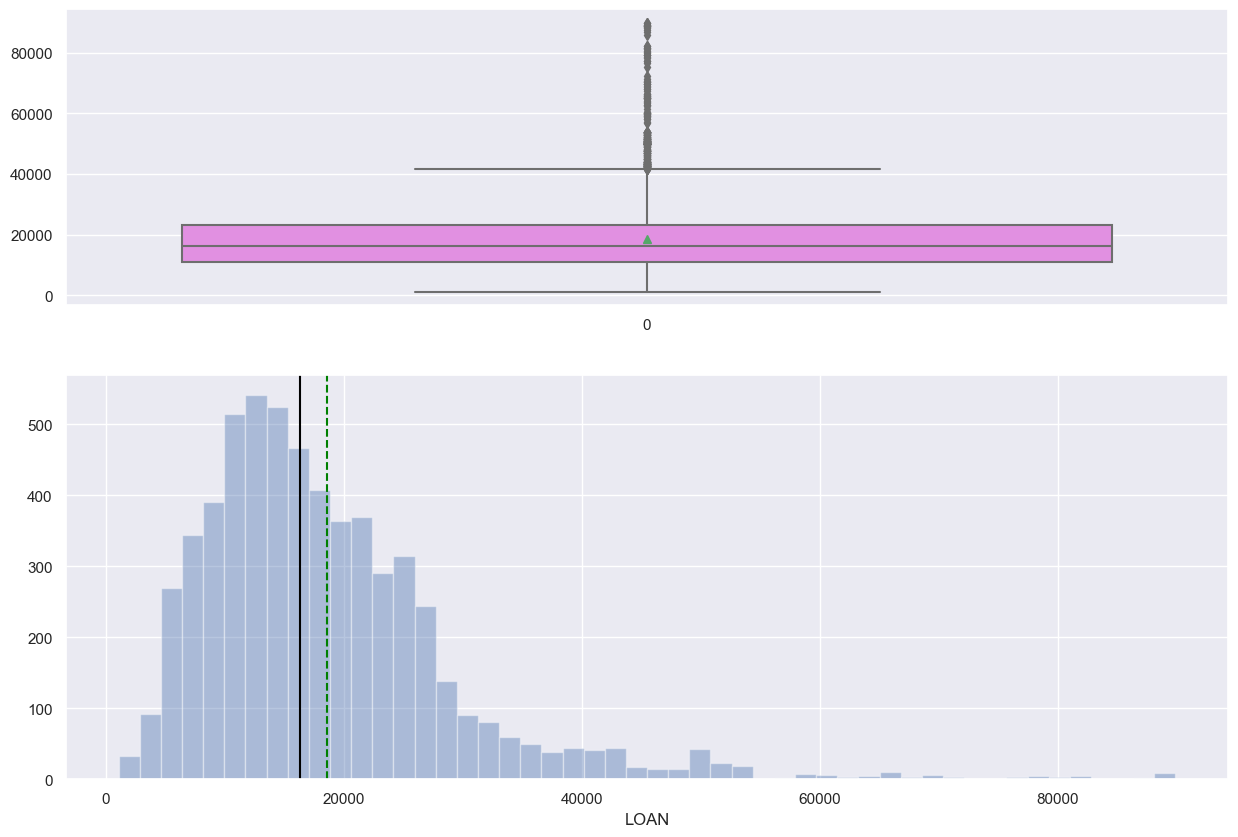

In [18]:
# Build the histogram boxplot for Loan
histogram_boxplot(data['LOAN'], sharex=False)

**Insights**  
1. The graph is right skewed i.e. LOAN amount offered is generally at the lower end and has outliers at the left end

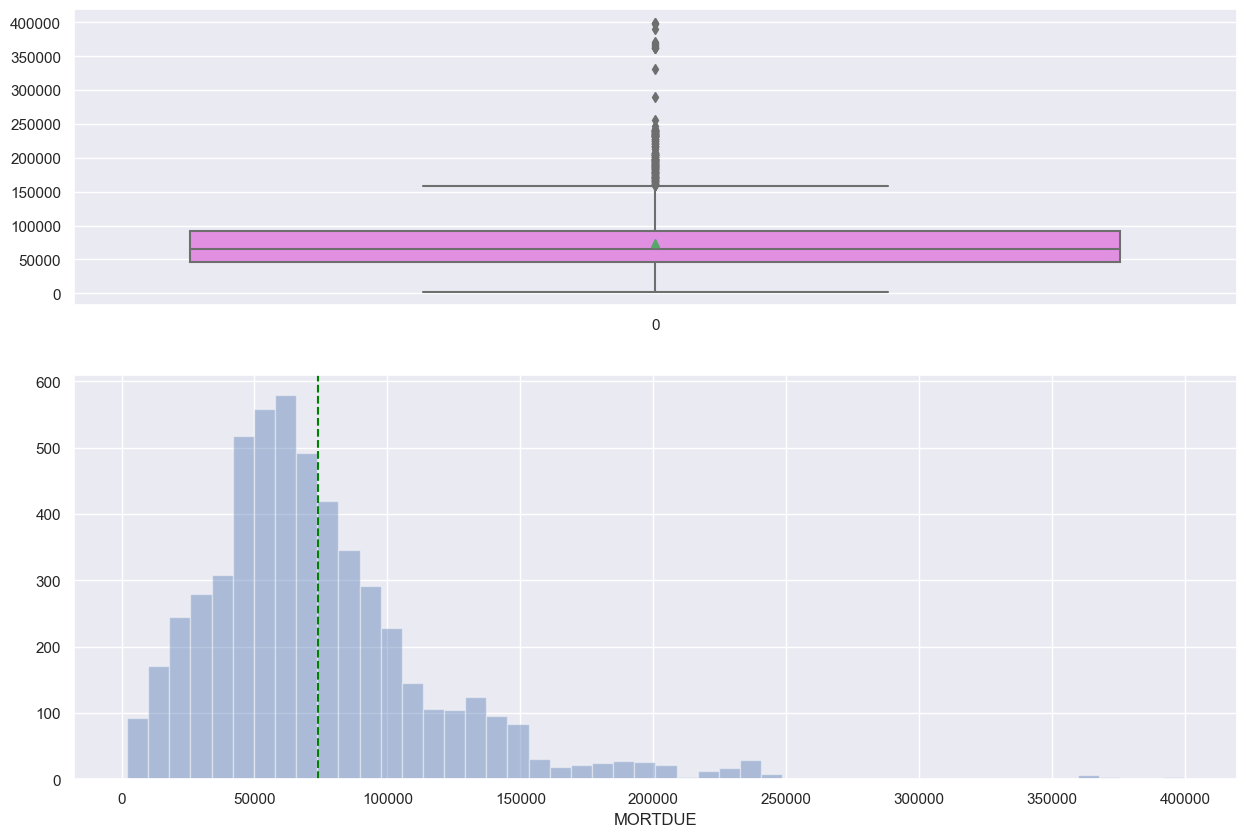

In [19]:
# Build the histogram boxplot for MORTDUE
histogram_boxplot(data['MORTDUE'], sharex=False)

**Insights**
1. Mortgage amount due is at the lower end on the range and has outliers at the high end

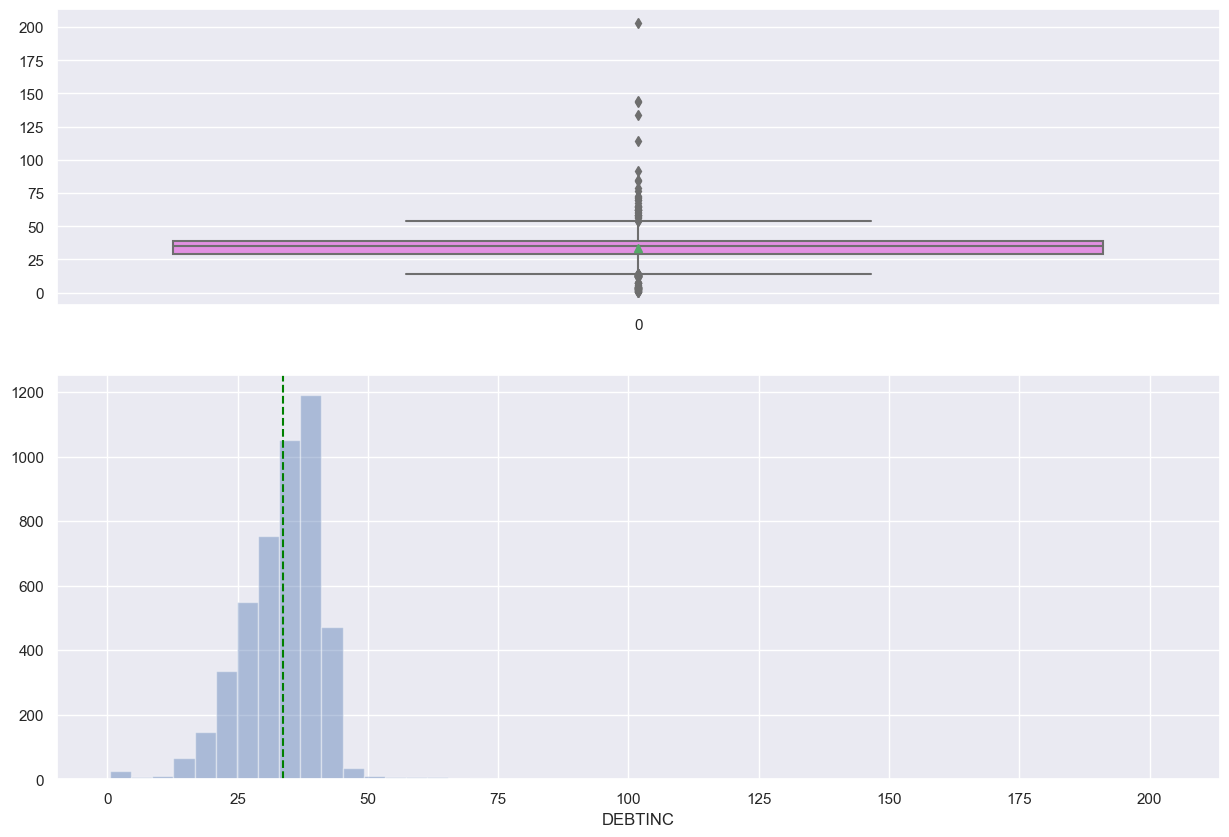

In [20]:
# Build the histogram boxplot for DEBTINC
histogram_boxplot(data['DEBTINC'], sharex=False)

**Insights**  
1. Most of the values lie between 25 and around 45. There are outliears at both ends.

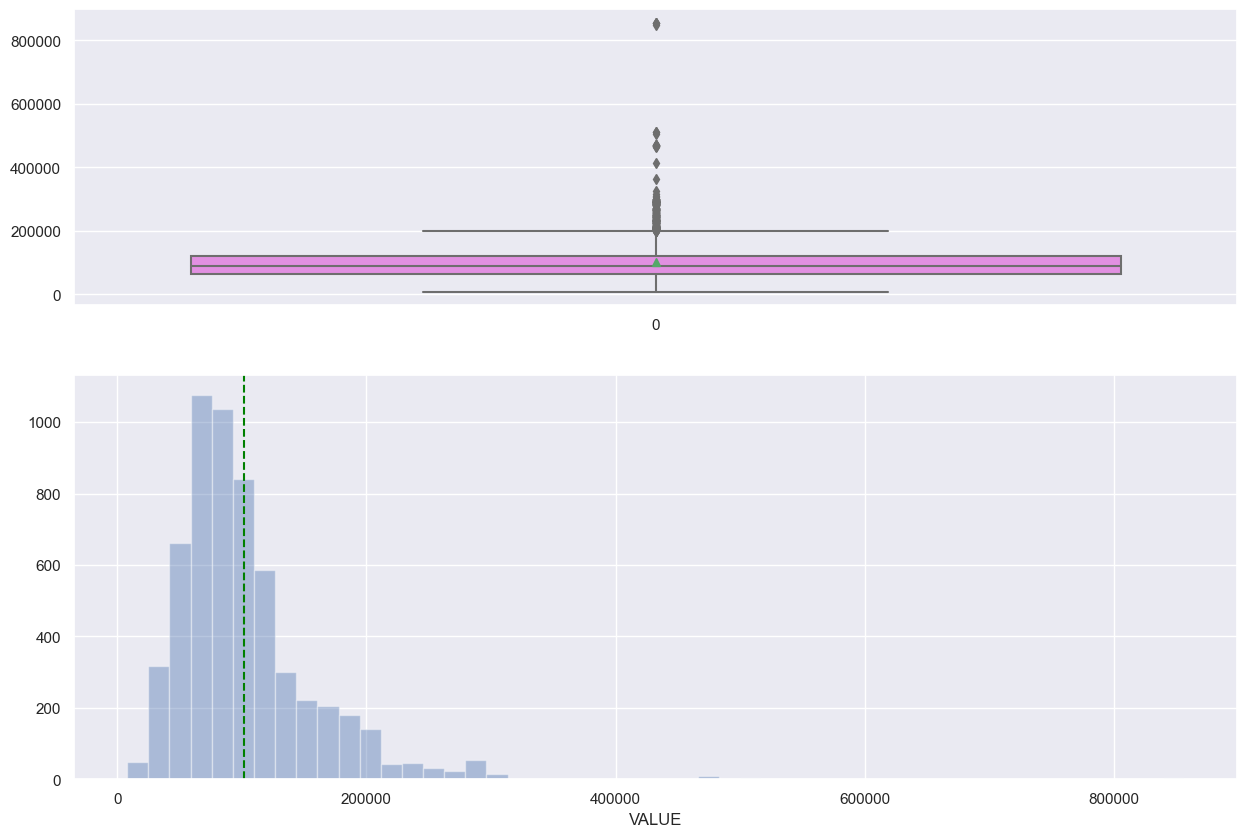

In [21]:
# Build the histogram boxplot for VALUE
histogram_boxplot(data['VALUE'], sharex=False)

**Insights**  
1. Most of the values are to the left of the range.

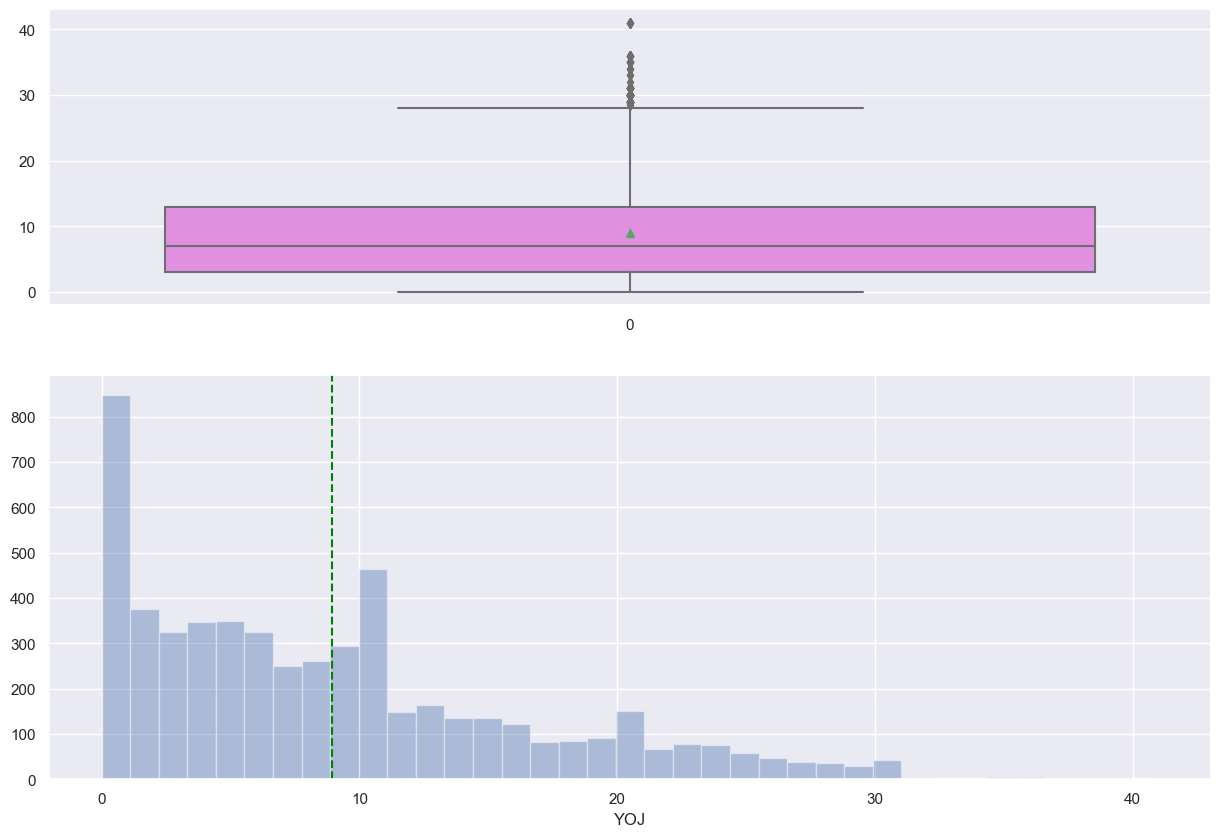

In [22]:
# Build the histogram boxplot for YOJ
histogram_boxplot(data['YOJ'], sharex=False)

**Insights**
1. Years at present job takes values between 0 and 30. Most of the lendees having spent 0 years at the present job.

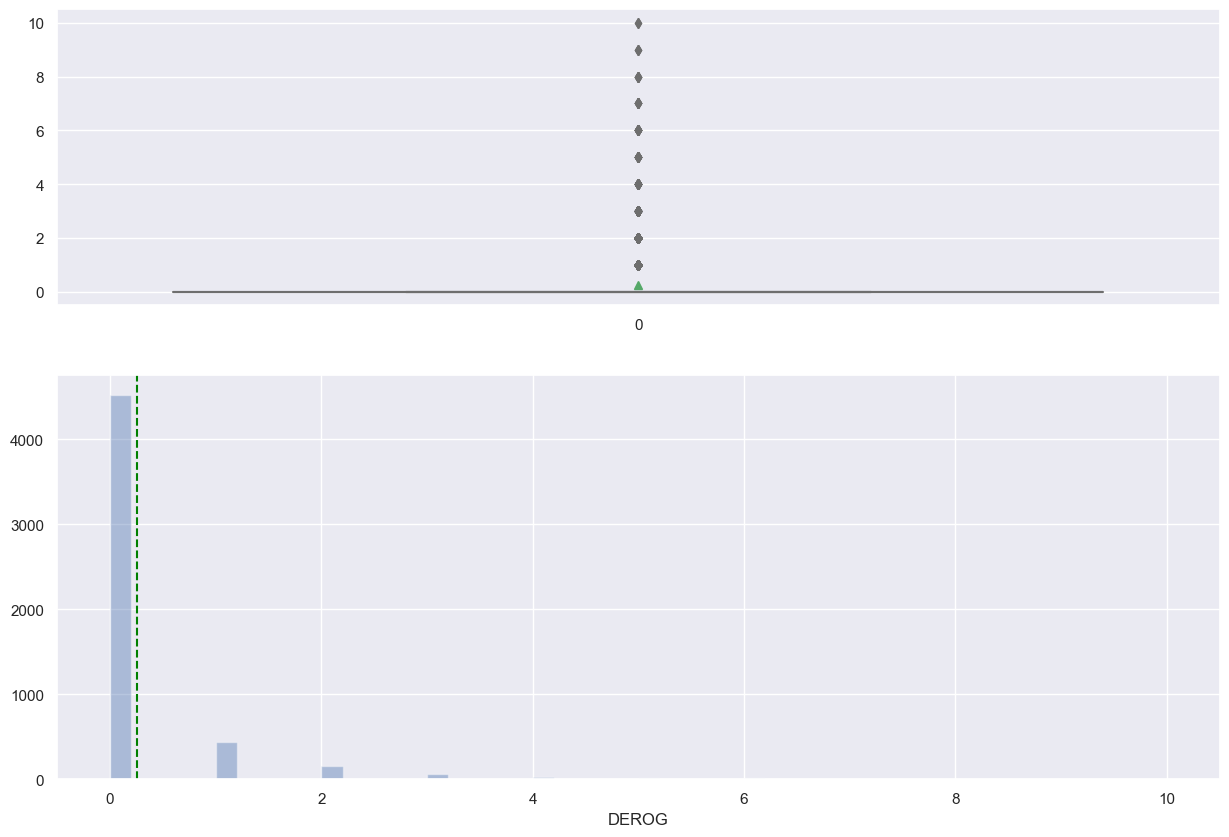

In [23]:
# Build the histogram boxplot for DEROG
histogram_boxplot(data['DEROG'], sharex=False)

**Insights**  
1. Most of the lendees have 0 major derogatory reports.

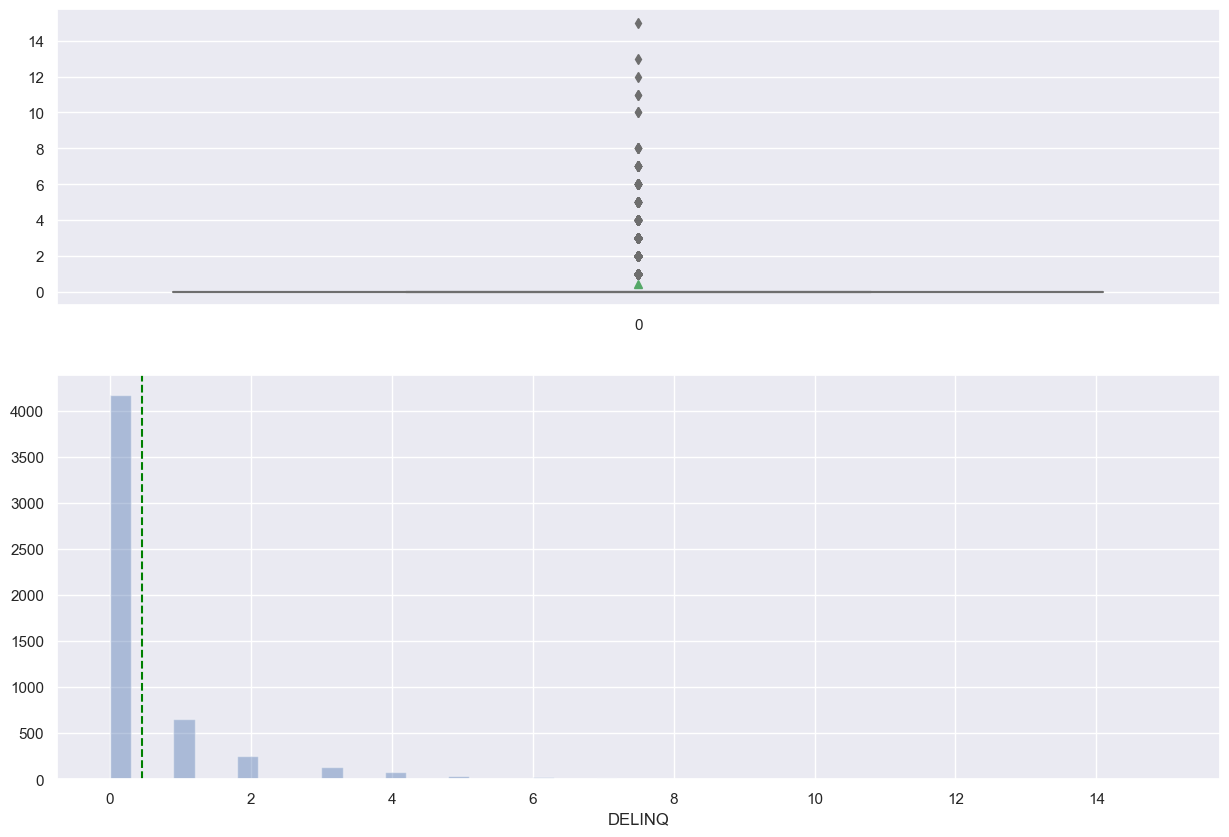

In [24]:
# Build the histogram boxplot for DELINQ
histogram_boxplot(data['DELINQ'], sharex=False)

**Insights**  
1. Most of the lendees have 0 delinquent credit lines.

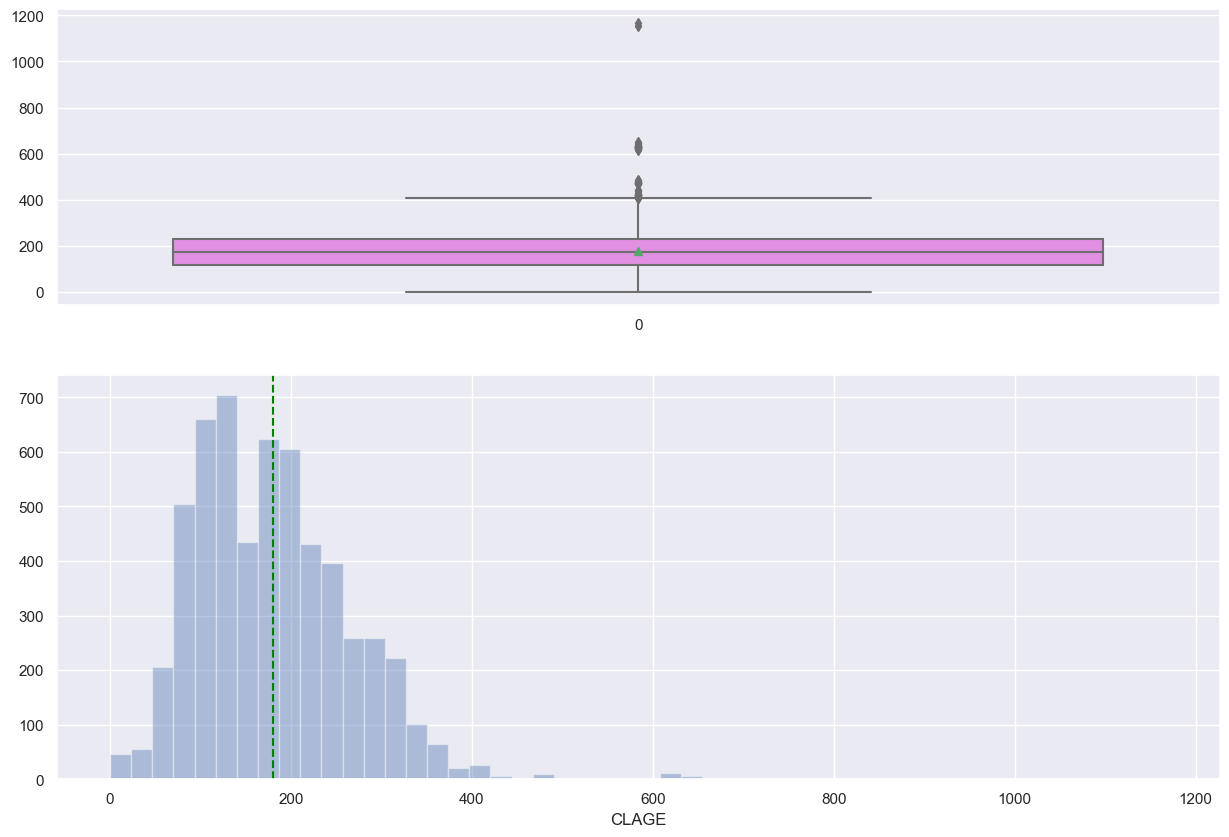

In [25]:
# Build the histogram boxplot for CLAGE
histogram_boxplot(data['CLAGE'], sharex=False)

**Insights**
1. Age of the oldest credit line has most of the values at the lower end and a few outliers

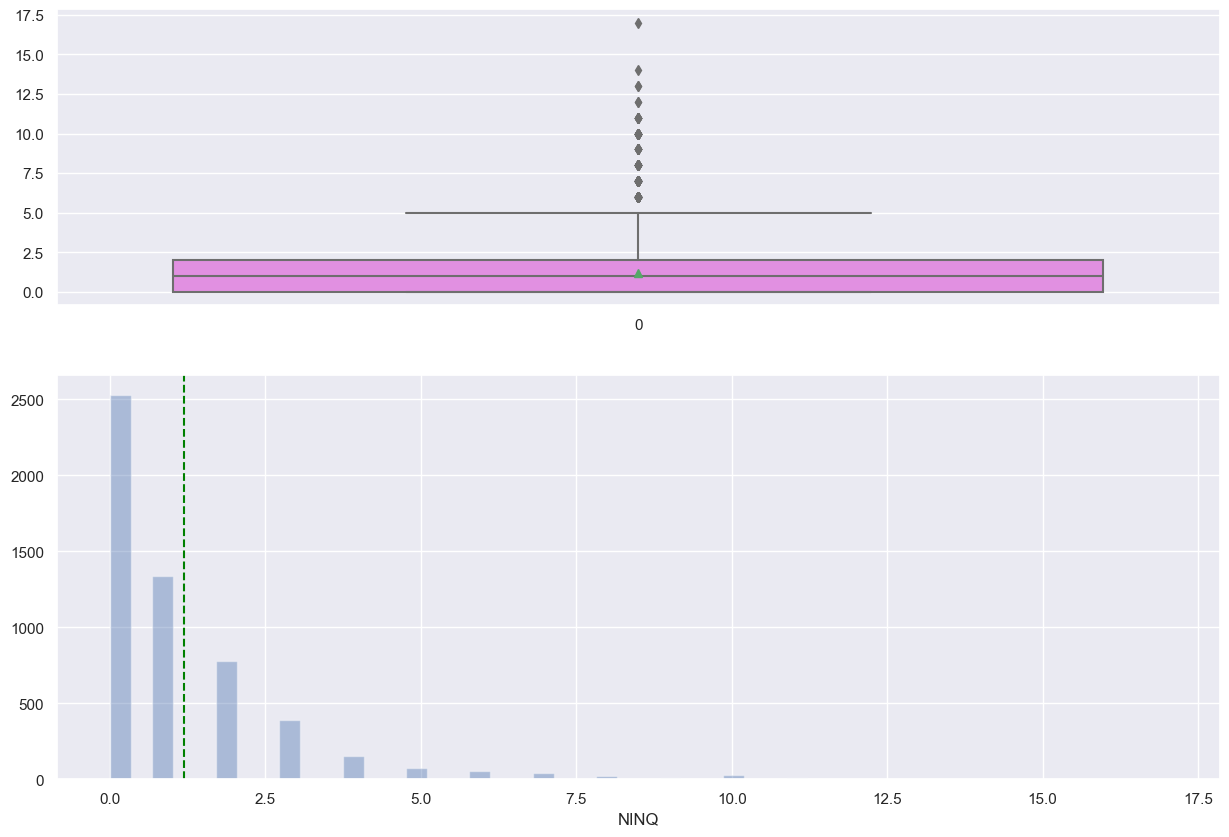

In [26]:
# Build the histogram boxplot for NINQ
histogram_boxplot(data['NINQ'], sharex=False)

**Insights**  
1. Number of recent credit inquiries are mostly at 0.0 with a few outliers between 5 and 17.5.

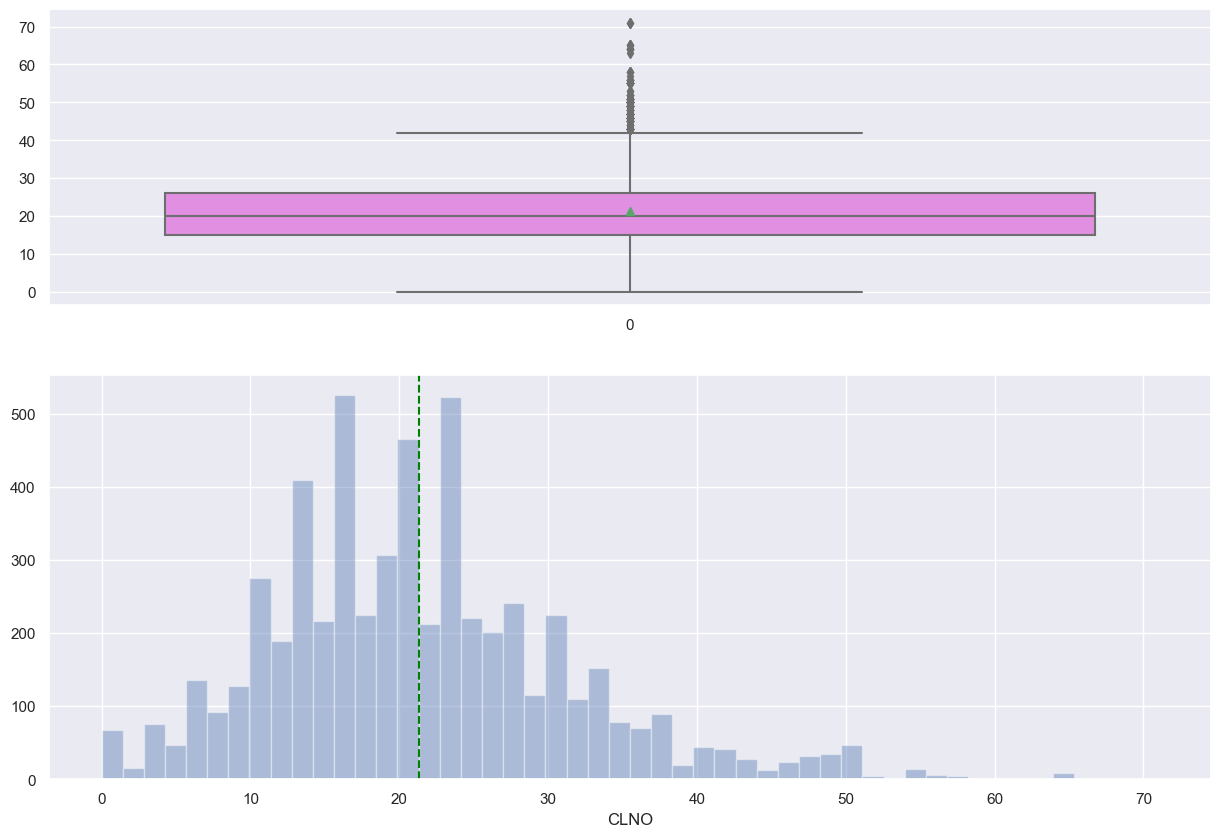

In [27]:
# Build the histogram boxplot for CLNO
histogram_boxplot(data['CLNO'], sharex=False)

**Insights**:
1. Number of existing credit lines has a mean around 21.4 and few outliers at the high end.
2. Seems to be a bimodal uniform distribution.

### **2. Univariate Analysis - Categorical Data**

In [28]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(feature) # length of the column
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # height of the plot
        plot.annotate(percentage, (x, y), size = 12) # annotate the percentage 
        
    plt.show() # show the plot

#### Analyze Barplot for DELINQ

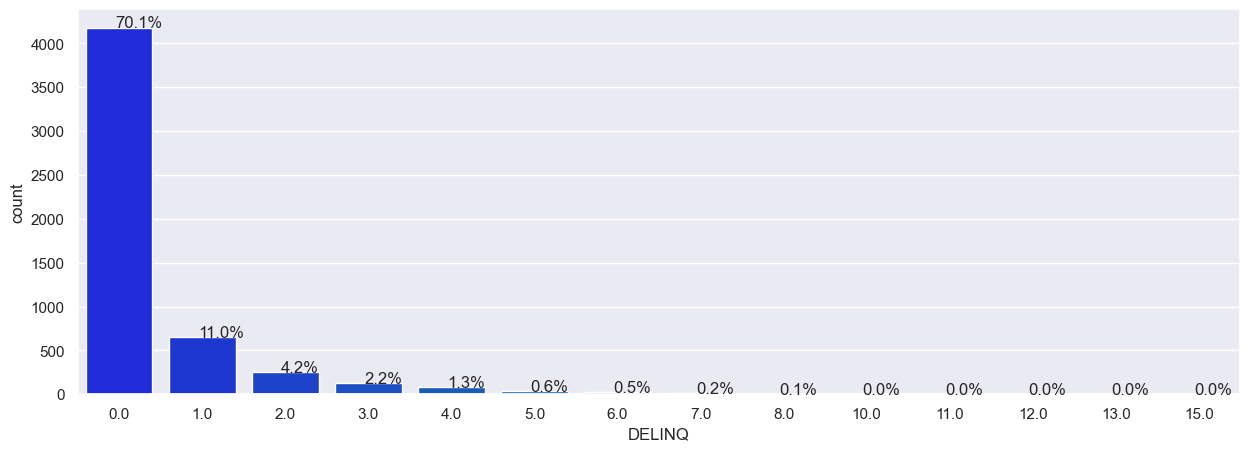

In [29]:
#Build barplot for DELINQ
plt.figure(figsize=(15,5))
ax = sns.countplot(x=data["DELINQ"], palette='winter')
perc_on_bar(ax,data["DELINQ"])

**Insights**  
1. DELINQ has 70.1% of values at 0.0.

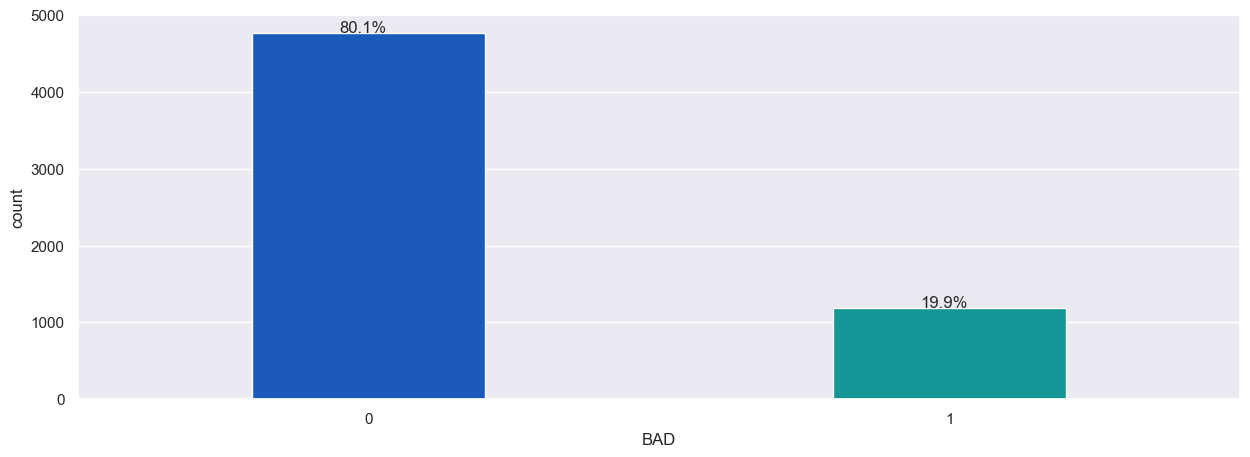

In [30]:
#Build barplot for BAD
plt.figure(figsize=(15,5))
ax = sns.countplot(x = data["BAD"], palette='winter', width = 0.4)
perc_on_bar(ax,data["BAD"])

**Insights**:
1. Around 80.1% lendees repay the loan.

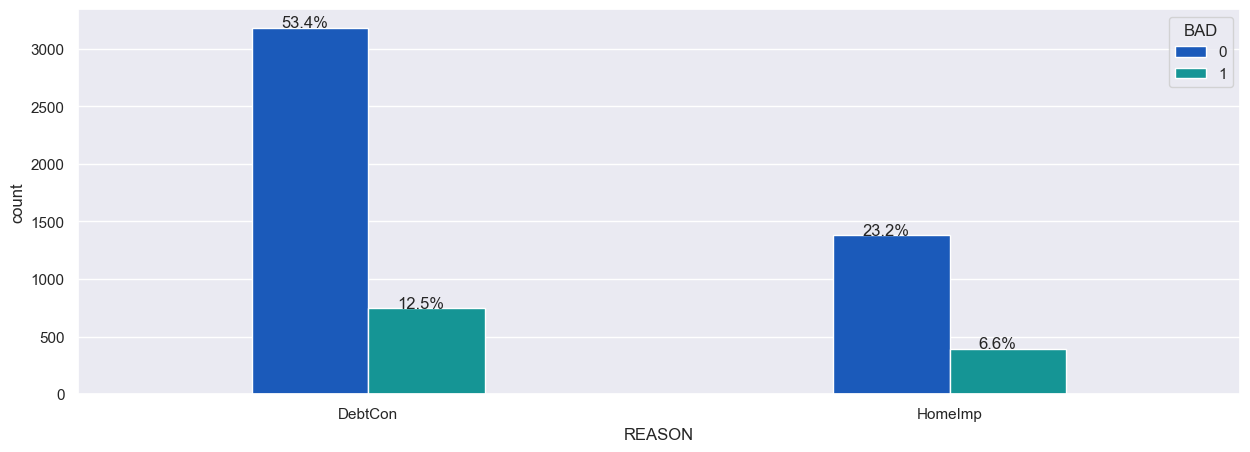

In [31]:
#Build barplot for REASON
plt.figure(figsize=(15,5))
ax = sns.countplot(x = data["REASON"], palette='winter', width = 0.4, hue=data['BAD'])
perc_on_bar(ax,data["REASON"])

**Insights**  
1. Reason for loan is generally DebtCon

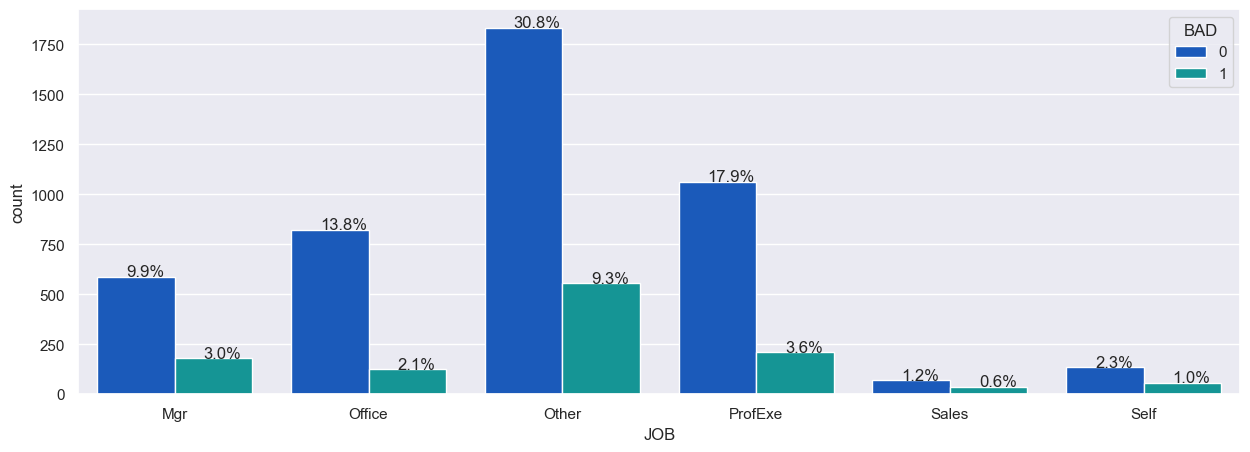

In [32]:
#Build barplot for JOB
plt.figure(figsize=(15,5))
ax = sns.countplot(x = data["JOB"], palette='winter', hue=data['BAD'])
perc_on_bar(ax,data["JOB"])

**Insights**
1. Most of the lendees have a job other than Mgr, Office, ProfExe, Sales and Self.

## **Bivariate Analysis**

### **Bivariate Analysis: Continuous and Categorical Variables**

#### Analyze BAD vs Loan

<AxesSubplot:xlabel='BAD', ylabel='LOAN'>

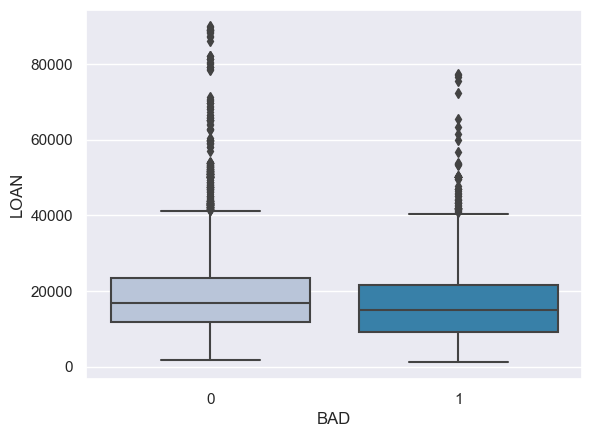

In [33]:
sns.boxplot(x=data["BAD"],y=data['LOAN'],palette="PuBu")

**Insights**  
1. The plot shows that 1st quartile to 3rd quartile value of loan for load repaid is slightly higher than for loan defaulted. Loan amount given is higher for the loan being repaid.

#### Analyze BAD vs DEBTINC

<AxesSubplot:xlabel='BAD', ylabel='DEBTINC'>

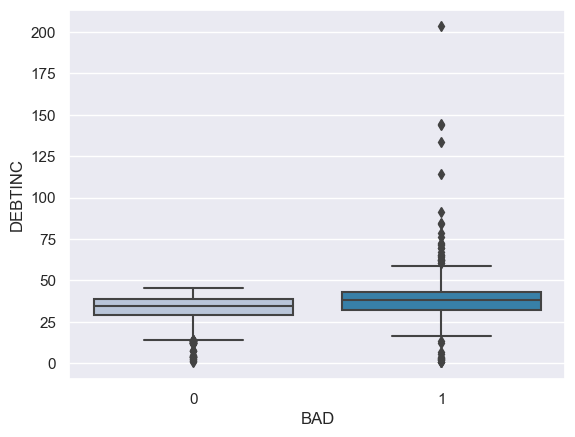

In [34]:
sns.boxplot(x=data["BAD"],y=data['DEBTINC'],palette="PuBu")

**Insights**  
1. Debt-to-income ratio having higher values than 50 seem to definitely result in default

#### Analyze BAD vs MORTDUE

<AxesSubplot:xlabel='BAD', ylabel='MORTDUE'>

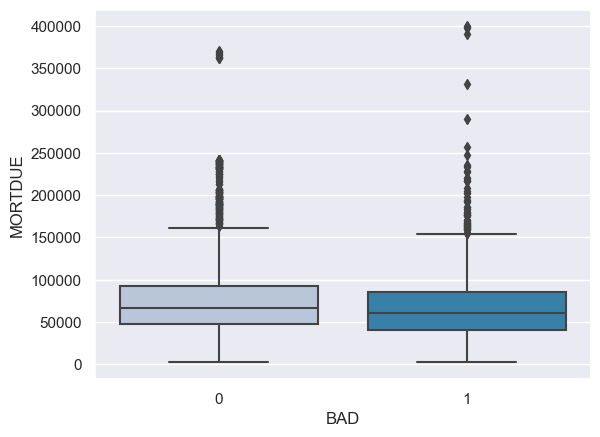

In [35]:
sns.boxplot(x=data["BAD"],y=data['MORTDUE'],palette="PuBu")

**Insights**  
1. The plot shows that 1st quartile to 3rd quartile value of Mortdue for load repaid is slightly higher than for loan defaulted. Both have outliers at the higher end with loan defaulting having more outliers.

#### Analyze BAD vs CLNO

<AxesSubplot:xlabel='BAD', ylabel='CLNO'>

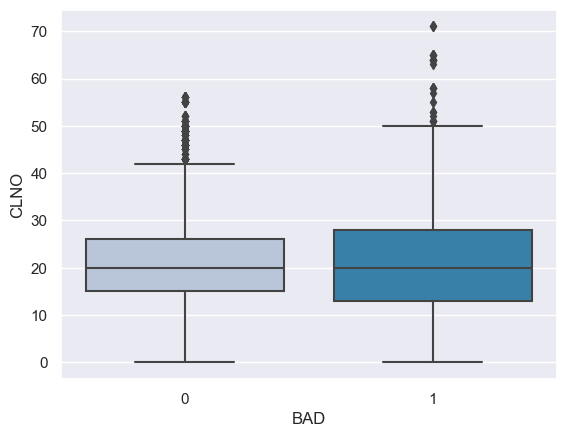

In [36]:
sns.boxplot(x=data["BAD"],y=data['CLNO'],palette="PuBu")

**Insights**  
1. The plot shows that IQR of CLNO for loan defaulted has a wider range than loan repaid.

#### Analyze BAD vs CLAGE

<AxesSubplot:xlabel='BAD', ylabel='CLAGE'>

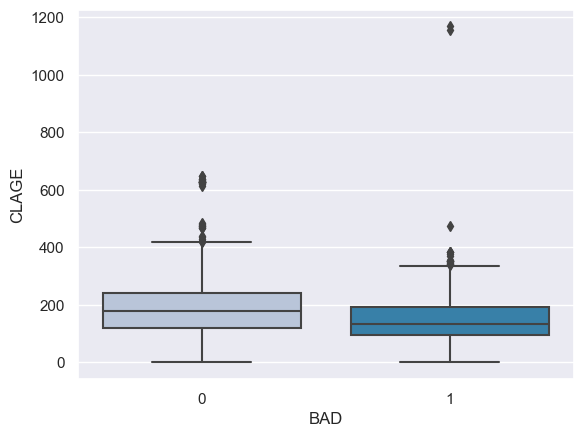

In [37]:
sns.boxplot(x=data["BAD"],y=data['CLAGE'],palette="PuBu")

**Insights**  
1. Too high values of CLAGE result in loan default.

#### Analyze BAD vs VALUE

<AxesSubplot:xlabel='BAD', ylabel='VALUE'>

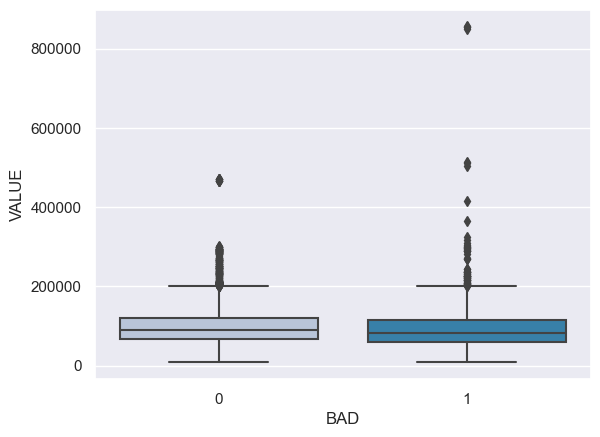

In [38]:
sns.boxplot(x=data["BAD"],y=data['VALUE'],palette="PuBu")

**Insights**  
1. The plot shows that for too high a VALUE the loan results in a default.

#### Analyze REASON vs MORTDUE

<AxesSubplot:xlabel='REASON', ylabel='MORTDUE'>

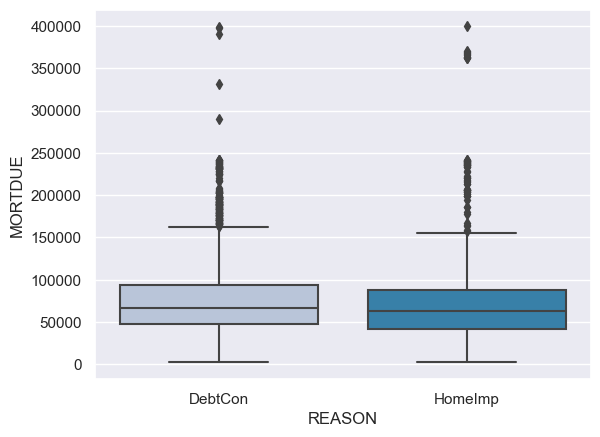

In [39]:
sns.boxplot(x=data["REASON"],y=data['MORTDUE'],palette="PuBu")

**Insights**  
1. Mortdue seems to have almost same value for both reasons.

#### Analyze REASON vs LOAN

<AxesSubplot:xlabel='REASON', ylabel='LOAN'>

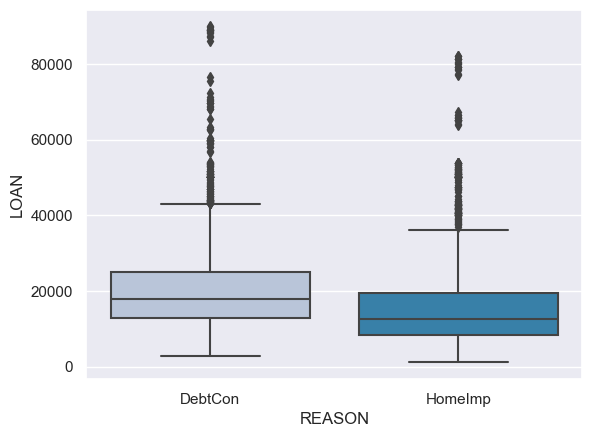

In [40]:
sns.boxplot(x=data["REASON"],y=data['LOAN'],palette="PuBu")

**Insights**  
1. Loan amount has a wider range for DebtCon than HomeImp indicating that either higher values are being accepted or in general the loan amount required is higher for DebtCon.

#### Analyze JOB vs LOAN

<AxesSubplot:xlabel='JOB', ylabel='LOAN'>

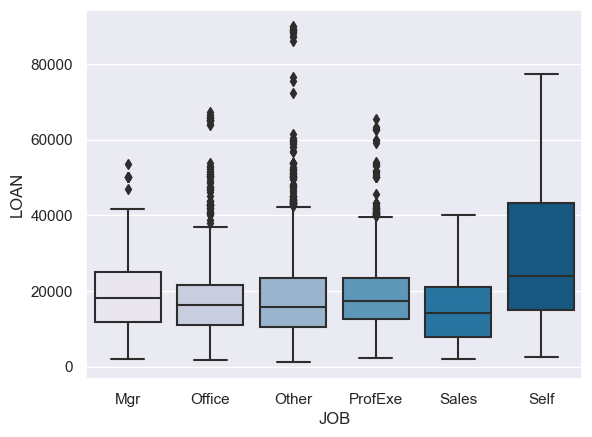

In [41]:
sns.boxplot(x=data["JOB"],y=data['LOAN'],palette="PuBu")

**Insights**  
1. Self and Sales do not have outliers. Self employed lendees are wither looking or getting more loans.
2. Other has most outliers.

### **Bivariate Analysis: Two Continuous Variables**

<AxesSubplot:xlabel='MORTDUE', ylabel='VALUE'>

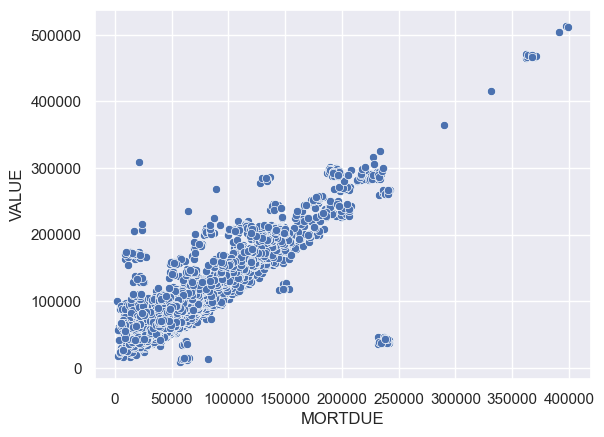

In [42]:
sns.scatterplot(y=data["VALUE"],x=data['MORTDUE'],palette="PuBu")

**Insights:**
1. For higher MORTDUE the Value of the property is also higher. There seems to be a linear relationship between these variables.

<AxesSubplot:xlabel='DEBTINC', ylabel='CLNO'>

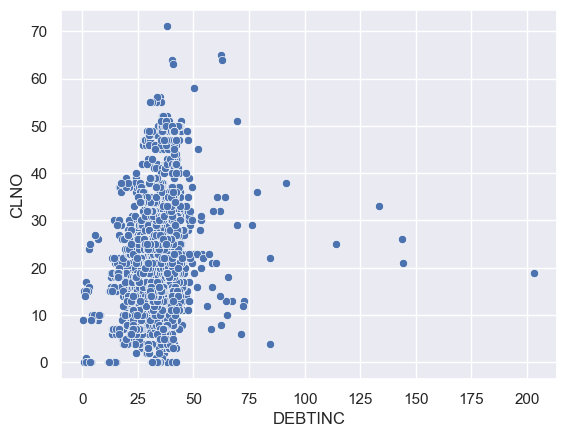

In [43]:
sns.scatterplot(y=data["CLNO"],x=data['DEBTINC'],palette="PuBu")

**Insights:**  
1. DEBTINC mostly has lower values.
2. There does not seem to be a relationship between these variables.

<AxesSubplot:xlabel='NINQ', ylabel='LOAN'>

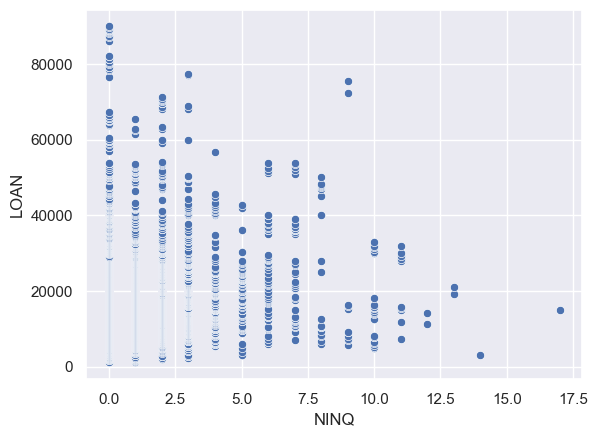

In [44]:
sns.scatterplot(y=data["LOAN"],x=data['NINQ'],palette="PuBu")

**Insights:**  
1. As NINQ increases LOAN has lower values indicating an inverse relationship

<AxesSubplot:xlabel='DELINQ', ylabel='LOAN'>

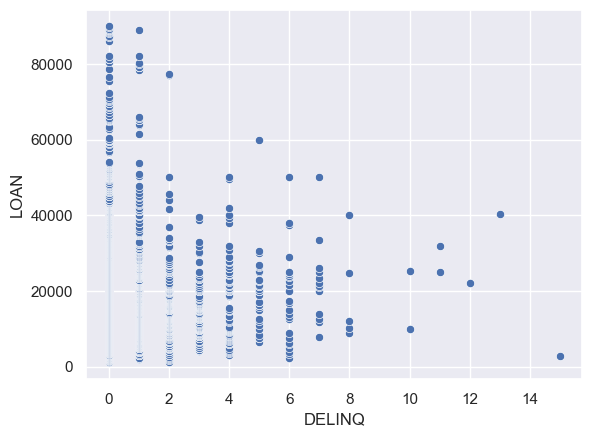

In [45]:
sns.scatterplot(y=data["LOAN"],x=data['DELINQ'],palette="PuBu")

**Insights**
1. LOAN has higher values for lower values of DELINQ and this does not exist for higher values of DELINQ.

### **Bivariate Analysis:  BAD vs Categorical Variables**

**The stacked bar chart (aka stacked bar graph)** extends the standard bar chart from looking at numeric values across one categorical variable to two.

In [46]:
### Function to plot stacked bar charts for categorical columns

def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,data['BAD'],margins=True)
    print(tab1)
    print('-'*100)
    tab = pd.crosstab(x,data['BAD'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

#### Plot stacked bar plot for for LOAN and REASON

BAD         0     1   All
REASON                   
DebtCon  3183   745  3928
HomeImp  1384   396  1780
All      4567  1141  5708
----------------------------------------------------------------------------------------------------


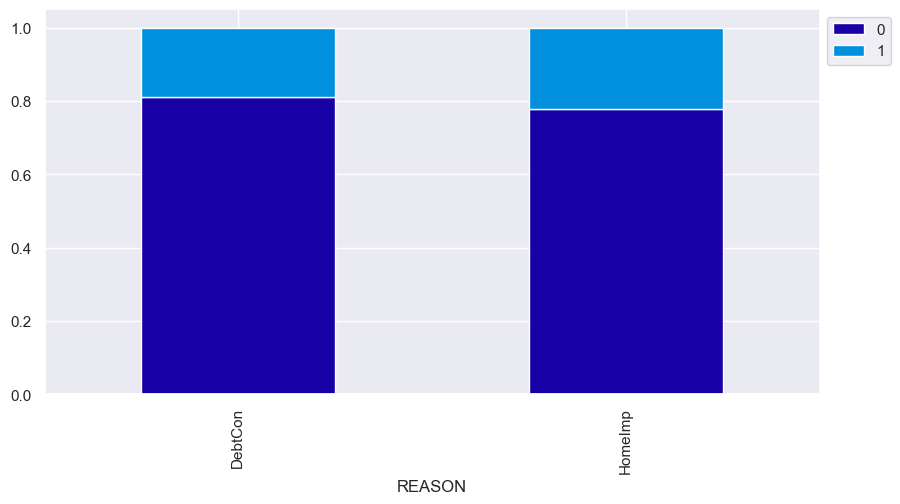

In [47]:
# Plot stacked bar plot for BAD and REASON
stacked_plot(data['REASON'])

**Insights**  
1. For both REASON the loan is repaid

BAD         0     1   All
JOB                      
Mgr       588   179   767
Office    823   125   948
Other    1834   554  2388
ProfExe  1064   212  1276
Sales      71    38   109
Self      135    58   193
All      4515  1166  5681
----------------------------------------------------------------------------------------------------


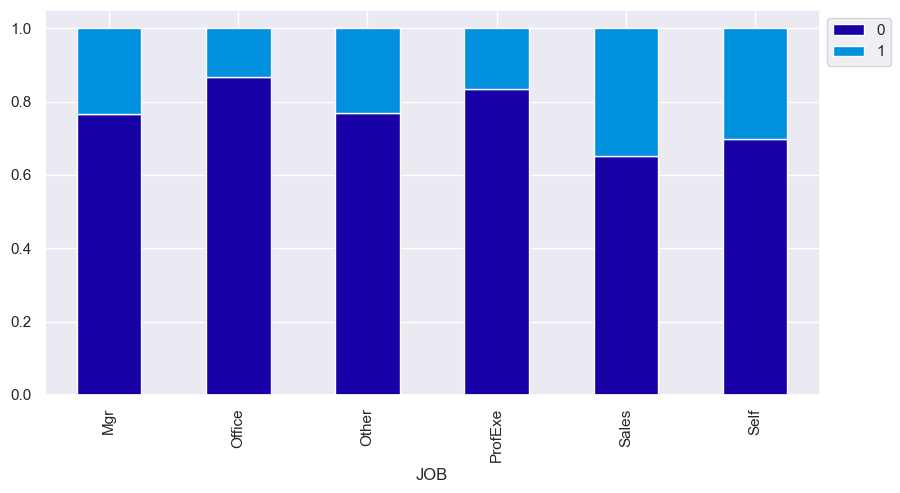

In [48]:
stacked_plot(data['JOB'])

**Insights**  
1. For all JOB profiles the loan is generally repaid. Self and Sales defaulting the most and Office and ProfExe defaulting the least

#### **Note:** As shown above, perform Bivariate Analysis on different pairs of Categorical vs BAD

### **Multivariate Analysis**

#### Analyze Correlation Heatmap for Numerical Variables

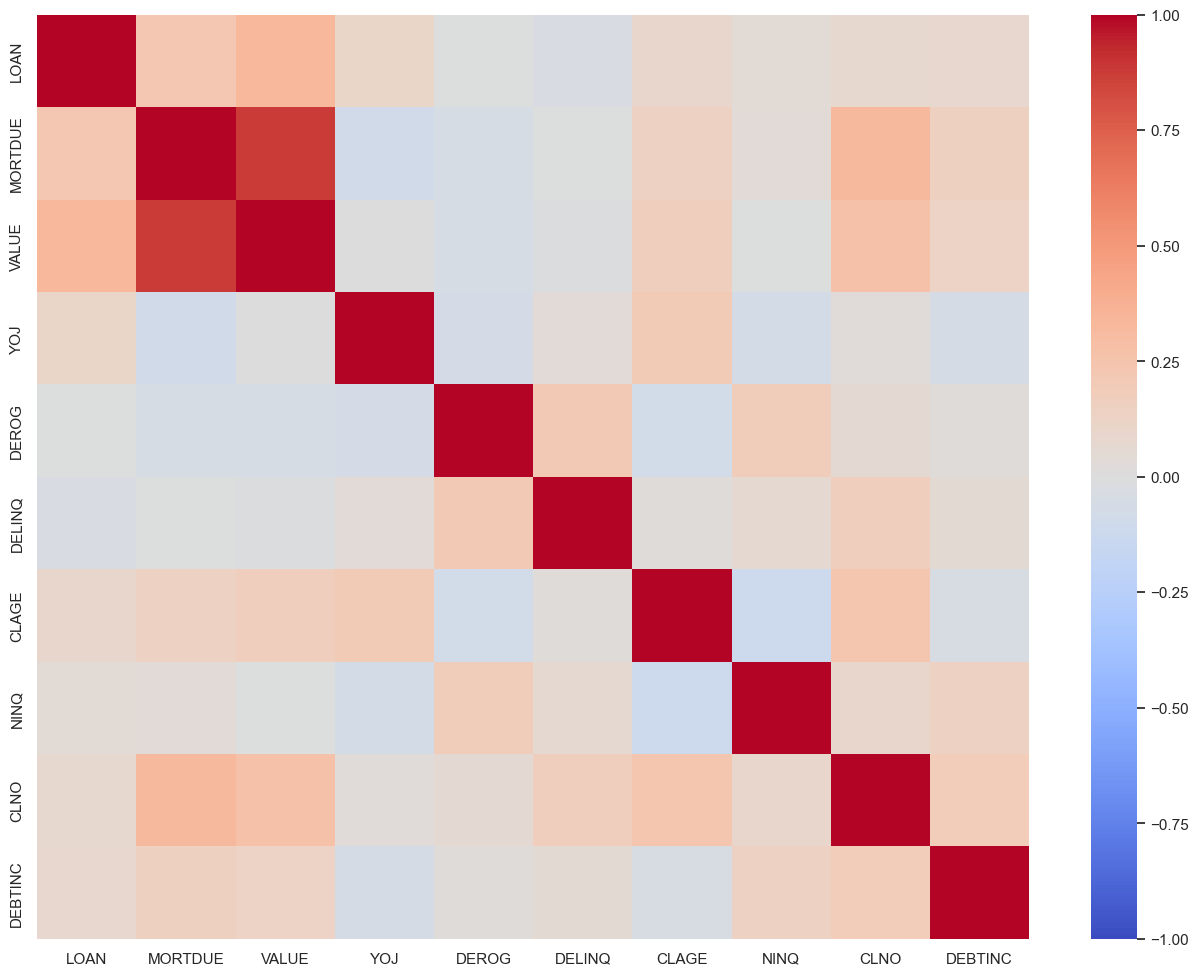

In [49]:
# Separating numerical variables
numerical_col = data.select_dtypes(include=np.number).columns.tolist()

# Build correlation matrix for numerical columns

corr = data[numerical_col].corr()

# plot the heatmap

plt.figure(figsize=(16,12))
sns.heatmap(corr,cmap='coolwarm',vmax=1,vmin=-1,
        fmt=".2f",
        xticklabels=corr.columns,
        yticklabels=corr.columns);

**Insights**  
1. VALUE and MORTDUE are highly positively correlated.
2. MORTDUE and CLNO, CLNO and LOAN, LOAN and VALUE are slightly positively correlated.
3. Rest of the positive and negative correlations seem insignificant. 

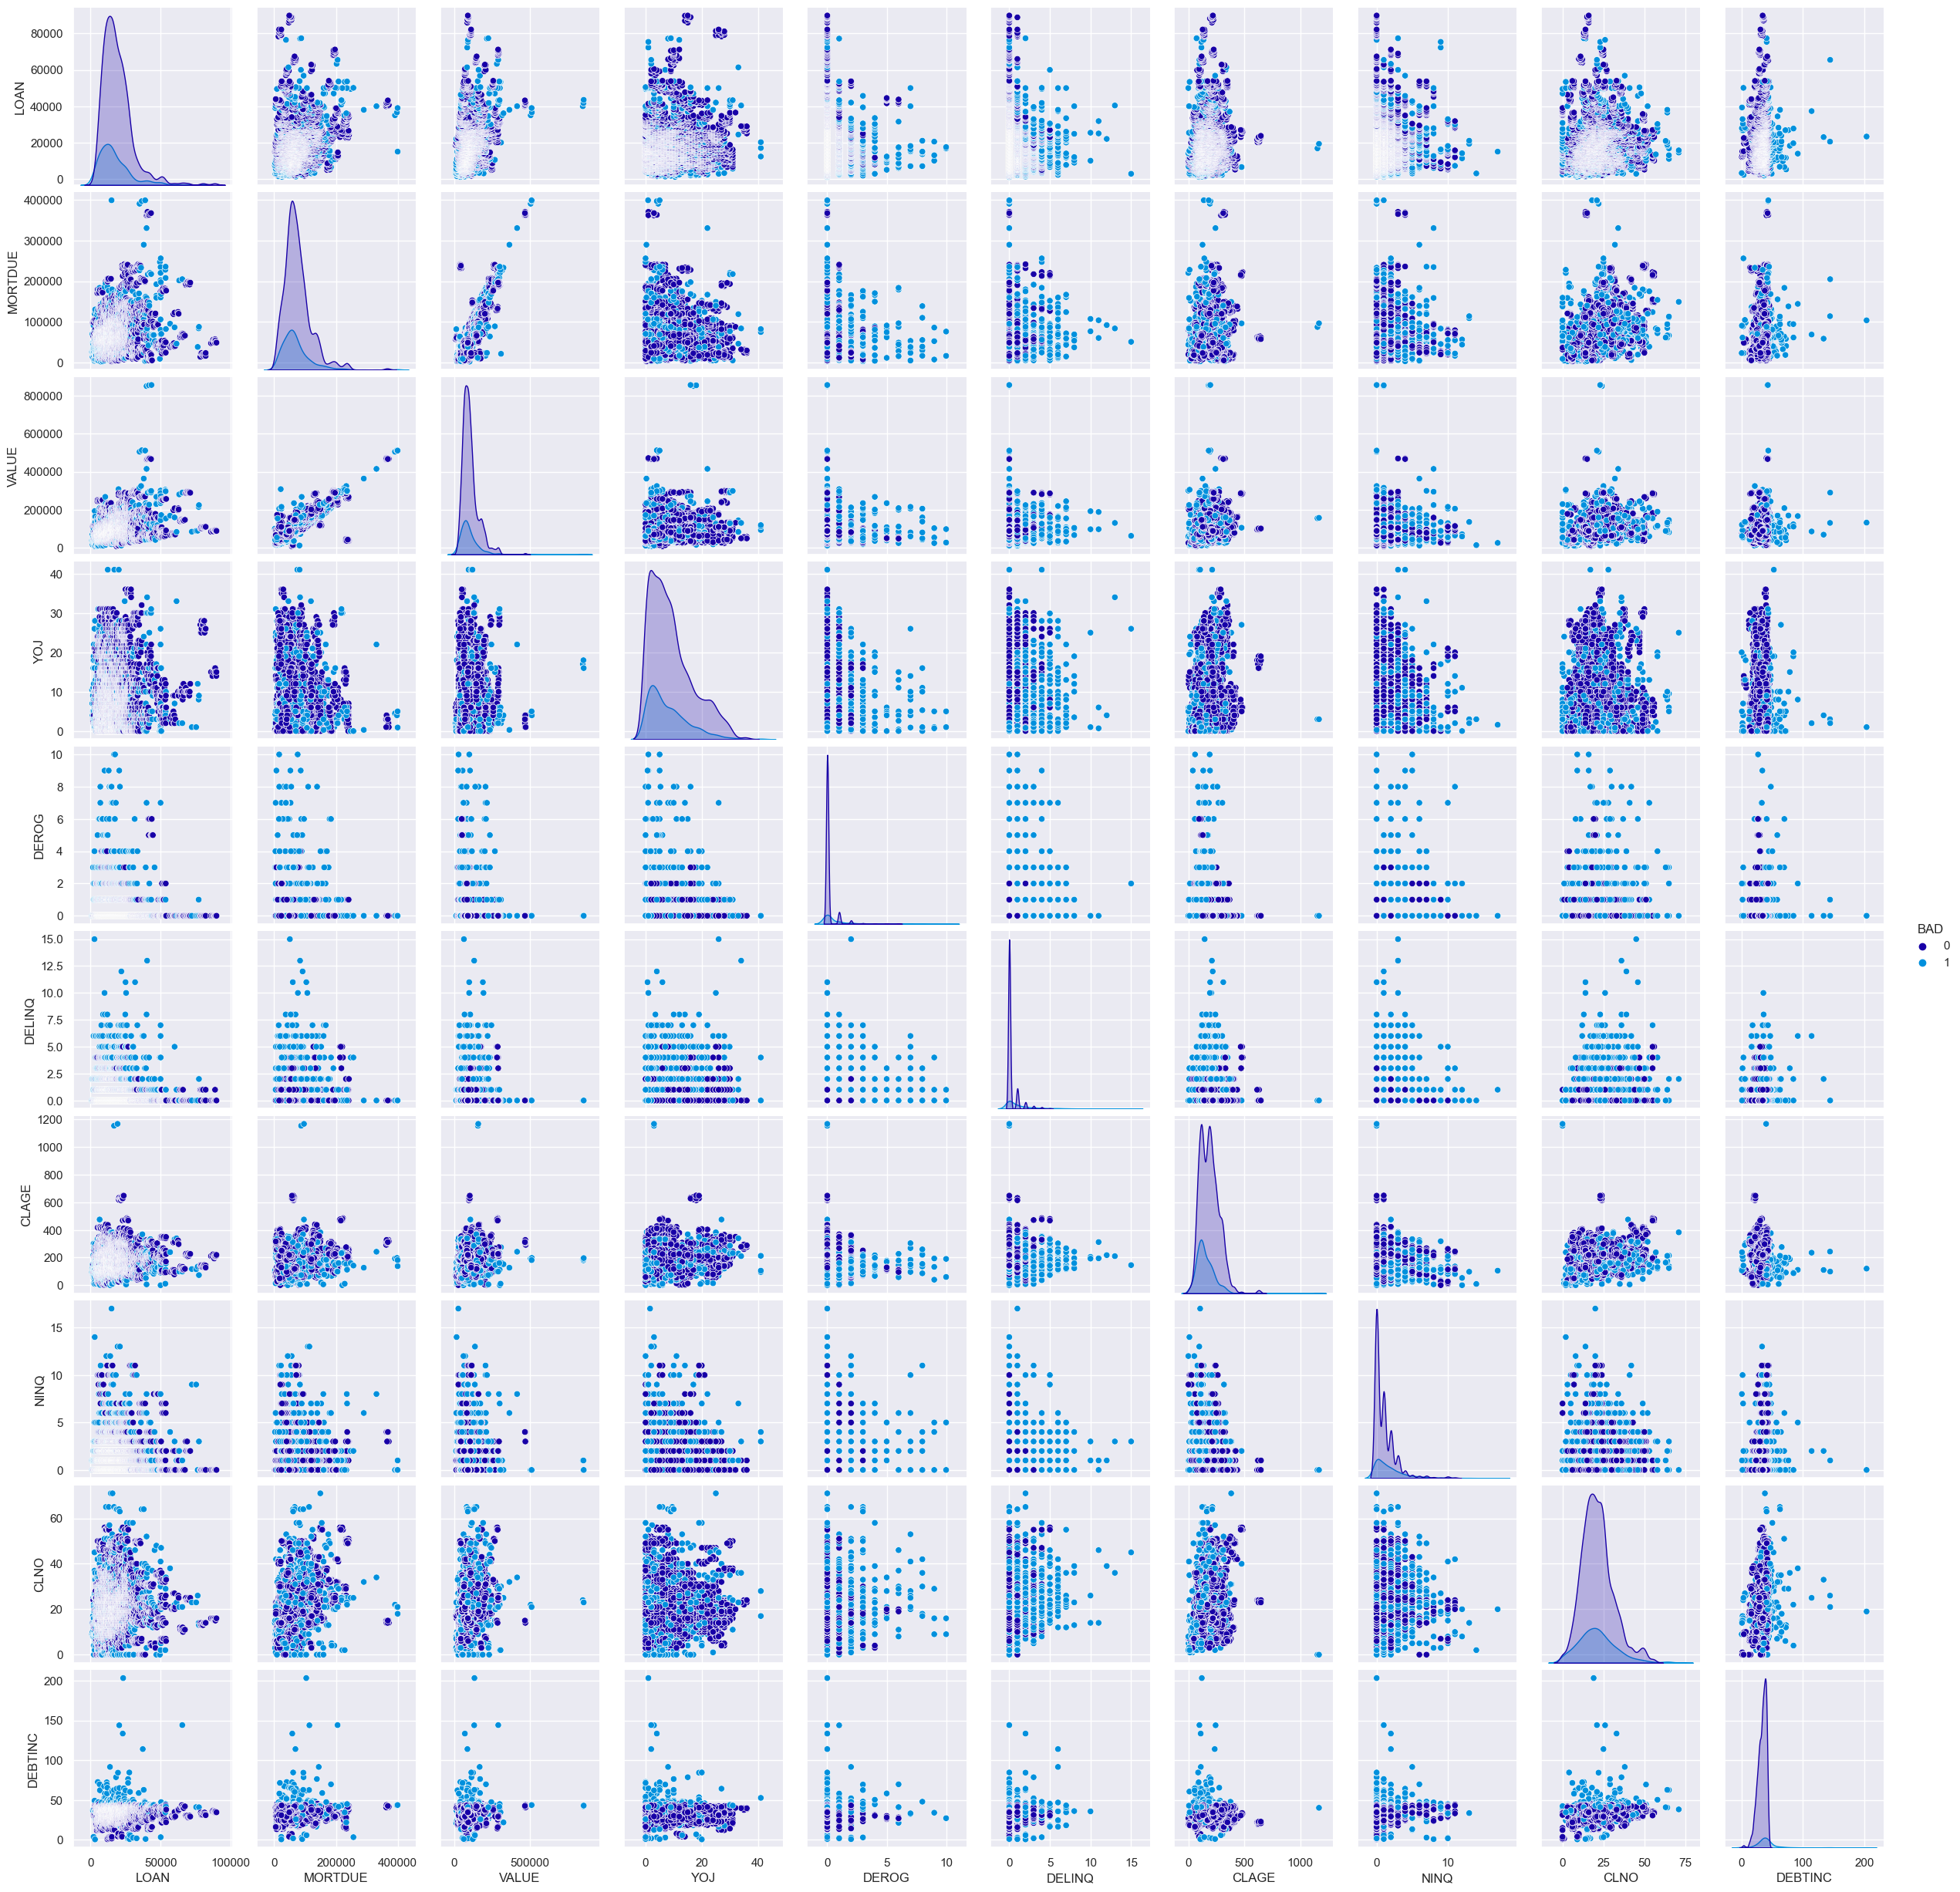

In [50]:
# Build pairplot for the data with hue = 'BAD'
sns.pairplot(data, hue='BAD')
plt.show()

**Insights**  
1. VALUE and MORTDUE are have linear relation

#### Treating Outliers

In [51]:
def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
    Q1 = df[col].quantile(0.25) # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1   # IQR Range
    Lower_Whisker = Q1 - 1.5 * IQR #define lower whisker
    Upper_Whisker = 1.5 * IQR + Q3 # define upper Whisker
    print(Q1, Q3, IQR, Lower_Whisker, Upper_Whisker)
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values smaller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df,c)
        
    return df
    

In [52]:
df_raw = data.copy()

numerical_col = df_raw.select_dtypes(include=np.number).columns.tolist()# getting list of numerical columns

df = treat_outliers_all(df_raw,numerical_col)

11100.0 23300.0 12200.0 -7200.0 41600.0
46276.0 91488.0 45212.0 -21542.0 159306.0
66075.5 119824.25 53748.75 -14547.625 200447.375
3.0 13.0 10.0 -12.0 28.0
0.0 0.0 0.0 0.0 0.0
0.0 0.0 0.0 0.0 0.0
115.11670223 231.56227814 116.44557590999999 -59.551661634999974 406.23064200499994
0.0 2.0 2.0 -3.0 5.0
15.0 26.0 11.0 -1.5 42.5
29.140031372 39.003140628 9.863109255999998 14.345367488000003 53.79780451199999


#### Adding new columns in the dataset for each column which has missing values 

In [53]:
df

BAD     LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
0      1   1100.0  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   
1      1   1300.0  70053.0   68400.0  HomeImp   Other   7.0    0.0     0.0   
2      1   1500.0  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0   
3      1   1500.0      NaN       NaN      NaN     NaN   NaN    NaN     NaN   
4      0   1700.0  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   
...   ..      ...      ...       ...      ...     ...   ...    ...     ...   
5955   0  41600.0  57264.0   90185.0  DebtCon   Other  16.0    0.0     0.0   
5956   0  41600.0  54576.0   92937.0  DebtCon   Other  16.0    0.0     0.0   
5957   0  41600.0  54045.0   92924.0  DebtCon   Other  15.0    0.0     0.0   
5958   0  41600.0  50370.0   91861.0  DebtCon   Other  14.0    0.0     0.0   
5959   0  41600.0  48811.0   88934.0  DebtCon   Other  15.0    0.0     0.0   

           CLAGE  NINQ  CLNO    DEBTINC  
0      94.366667   1.0   9.0        NaN  
1     121.833333   0.0  14.0        NaN  
2     149.466667   1.0  10.0        NaN  
3            NaN   NaN   NaN        NaN  
4      93.333333   0.0  14.0        NaN  
...          ...   ...   ...        ...  
5955  221.808718   0.0  16.0  36.112347  
5956  208.692070   0.0  15.0  35.859971  
5957  212.279697   0.0  15.0  35.556590  
5958  213.892709   0.0  16.0  34.340882  
5959  219.601002   0.0  16.0  34.571519  

[5960 rows x 13 columns]

#### Filling missing values in numerical columns with median and mode in categorical variables

In [54]:
def treating_missing_values(dataf):
    # Treat Missing values in numerical columns with median and mode in categorical variables
    # Select numeric columns.
    num_data = dataf.select_dtypes('number')
    num_missing_col = [col for col in num_data.columns if dataf[col].isnull().any()]

    # Select string and object columns.
    cat_data = dataf.select_dtypes('category')
    cat_missing_col = [col for col in cat_data.columns if dataf[col].isnull().any()]

    ## Fill numeric columns with median where values are missing.
    for col in num_missing_col:
        dataf[col] = dataf[col].fillna(dataf[col].median())

    ## Fill object columns with model.
    for column in cat_missing_col:
        mode = dataf[column].mode()[0]
        dataf[column] = dataf[column].fillna(mode)
    return dataf

In [55]:
df = treating_missing_values(df)

In [56]:
df.isna().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

## **Proposed approach**
**1. Potential techniques** - What different techniques should be explored?
1. Decision Trees, Random Forest - These include finding the attributes which influence the loan approval process and are the model and results are easier to understand.
2. Logistic Regression - Could act as the baseline model for this problem.
3. Neural Network - Self learns the patterns in the data and is good for classification problems. But, how the results are achieved cannot be understood from this.

**2. Overall solution design** - What is the potential solution design?
1. Splitting the data into train and test set
2. Training model using the train data and tuning hyperparameters of the model. Evaluating model on train set for both with and without hyperparameters.
3. Testing the model on the test set and evaluating based on Measures of success.
4. Choosing the model based on its performance on the test set.

**3. Measures of success** - What are the key measures of success?  
The model can go wrong in 2 ways: 
1. Predicting that applicant will default but they don't: FP
2. Predicting applicant will repay but defaults: FN  
The problem that is to be solved is to avoid defaulters. Recall will be used as measure of success. Higher the Recall lower are the false negatives.

## **Data Preparation**

### **Separating the target variable from other variables**

In [57]:
df.head() ## using data with missing values and outliers treated

BAD    LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
0   1  1100.0  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   
1   1  1300.0  70053.0   68400.0  HomeImp   Other   7.0    0.0     0.0   
2   1  1500.0  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0   
3   1  1500.0  65019.0   89235.5  DebtCon   Other   7.0    0.0     0.0   
4   0  1700.0  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   

        CLAGE  NINQ  CLNO    DEBTINC  
0   94.366667   1.0   9.0  34.818262  
1  121.833333   0.0  14.0  34.818262  
2  149.466667   1.0  10.0  34.818262  
3  173.466667   1.0  20.0  34.818262  
4   93.333333   0.0  14.0  34.818262

In [58]:
# Drop dependent variable from dataframe and create the X(independent variable) matrix
X = df.drop('BAD', axis=1)

# Create dummy variables for the categorical variables 
X = pd.get_dummies(X)

# Create y(dependent varibale)
y = df['BAD']

In [59]:
X.head()

LOAN  MORTDUE     VALUE   YOJ  DEROG  DELINQ       CLAGE  NINQ  CLNO  \
0  1100.0  25860.0   39025.0  10.5    0.0     0.0   94.366667   1.0   9.0   
1  1300.0  70053.0   68400.0   7.0    0.0     0.0  121.833333   0.0  14.0   
2  1500.0  13500.0   16700.0   4.0    0.0     0.0  149.466667   1.0  10.0   
3  1500.0  65019.0   89235.5   7.0    0.0     0.0  173.466667   1.0  20.0   
4  1700.0  97800.0  112000.0   3.0    0.0     0.0   93.333333   0.0  14.0   

     DEBTINC  REASON_DebtCon  REASON_HomeImp  JOB_Mgr  JOB_Office  JOB_Other  \
0  34.818262               0               1        0           0          1   
1  34.818262               0               1        0           0          1   
2  34.818262               0               1        0           0          1   
3  34.818262               1               0        0           0          1   
4  34.818262               0               1        0           1          0   

   JOB_ProfExe  JOB_Sales  JOB_Self  
0            0          0         0  
1            0          0         0  
2            0          0         0  
3            0          0         0  
4            0          0         0

In [60]:
y.head()

0    1
1    1
2    1
3    1
4    0
Name: BAD, dtype: category
Categories (2, int64): [0, 1]

### **Splitting the data into 70% train and 30% test set**

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5, stratify=y) ##stratify ensures that each class same same number of samples in the split


In [62]:
X_train.shape, y_train.shape

((4172, 18), (4172,))

In [63]:
X_test.shape, y_test.shape

((1788, 18), (1788,))

## **Model Evaluation Criterion**

#### After understanding the problem statement, think about which evaluation metrics to consider and why. 

In [64]:
#creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Eligible', 'Eligible'], yticklabels=['Not Eligible', 'Eligible'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

### **Build a Logistic Regression Model** 

In [65]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression().fit(X_train, y_train)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      3340
           1       0.64      0.03      0.05       832

    accuracy                           0.80      4172
   macro avg       0.72      0.51      0.47      4172
weighted avg       0.77      0.80      0.72      4172



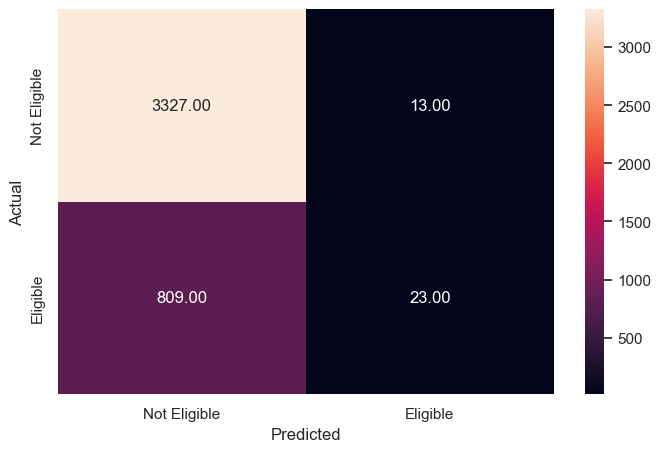

In [66]:
lr_train_predict = lr_clf.predict(X_train)
metrics_score(y_train, lr_train_predict)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.80      0.99      0.89      1431
           1       0.33      0.01      0.03       357

    accuracy                           0.80      1788
   macro avg       0.57      0.50      0.46      1788
weighted avg       0.71      0.80      0.72      1788



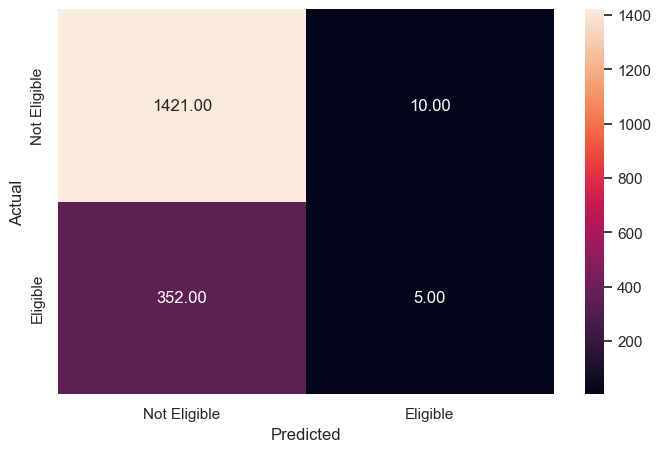

In [67]:
lr_test_predict = lr_clf.predict(X_test)
metrics_score(y_test, lr_test_predict)

**Insights**  
Recall for predicting defaulters is too low as the data is imbalanced.

#### Training model with class_weights to account for imbalance in data

In [68]:
lr_clf_balance = LogisticRegression(class_weight='balanced').fit(X_train, y_train) ## will automatically adjust class weights

              precision    recall  f1-score   support

           0       0.88      0.59      0.71      3340
           1       0.29      0.67      0.41       832

    accuracy                           0.61      4172
   macro avg       0.58      0.63      0.56      4172
weighted avg       0.76      0.61      0.65      4172



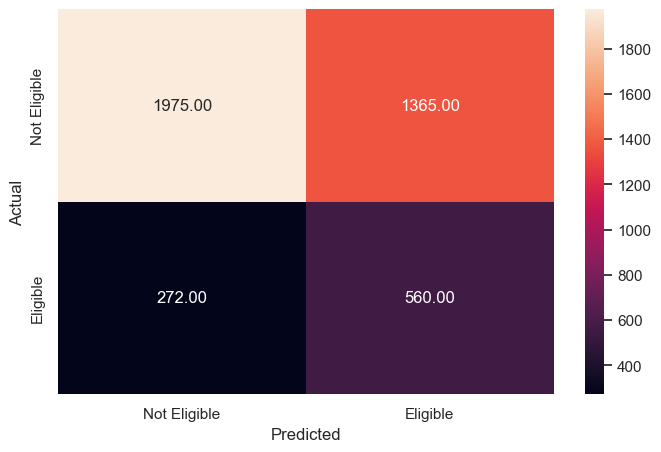

In [69]:
lr_train_predict_1 = lr_clf_balance.predict(X_train)
metrics_score(y_train, lr_train_predict_1)

              precision    recall  f1-score   support

           0       0.87      0.58      0.69      1431
           1       0.28      0.67      0.40       357

    accuracy                           0.59      1788
   macro avg       0.58      0.62      0.54      1788
weighted avg       0.76      0.59      0.63      1788



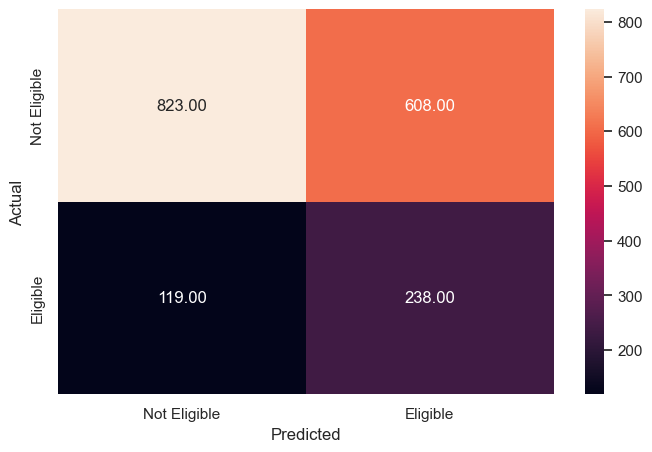

In [70]:
lr_test_predict_1 = lr_clf_balance.predict(X_test)
metrics_score(y_test, lr_test_predict_1)

**Insights**  
Even though the average recall is lower than in the case without class weights, the recall for each class is balanced. This is a better model.

### **Build a Decision Tree Model**

#### Data Preparation for the tree based model

In [71]:
df_dt = data.copy()
## Treating missing values - outliers are not treated as decision trees claasify based on boundaries and not the distance of point from the boundary
df_dt = treating_missing_values(df_dt)
df_dt.isna().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

#### Separating the target variable y and independent variable x

In [72]:
# Drop dependent variable from dataframe and create the X(independent variable) matrix
X = df_dt.drop('BAD', axis=1)

# Create dummy variables for the categorical variables 
X = pd.get_dummies(X)

# Create y(dependent varibale)
y = df_dt['BAD']

In [73]:
X.head()

LOAN  MORTDUE     VALUE   YOJ  DEROG  DELINQ       CLAGE  NINQ  CLNO  \
0  1100  25860.0   39025.0  10.5    0.0     0.0   94.366667   1.0   9.0   
1  1300  70053.0   68400.0   7.0    0.0     2.0  121.833333   0.0  14.0   
2  1500  13500.0   16700.0   4.0    0.0     0.0  149.466667   1.0  10.0   
3  1500  65019.0   89235.5   7.0    0.0     0.0  173.466667   1.0  20.0   
4  1700  97800.0  112000.0   3.0    0.0     0.0   93.333333   0.0  14.0   

     DEBTINC  REASON_DebtCon  REASON_HomeImp  JOB_Mgr  JOB_Office  JOB_Other  \
0  34.818262               0               1        0           0          1   
1  34.818262               0               1        0           0          1   
2  34.818262               0               1        0           0          1   
3  34.818262               1               0        0           0          1   
4  34.818262               0               1        0           1          0   

   JOB_ProfExe  JOB_Sales  JOB_Self  
0            0          0         0  
1            0          0         0  
2            0          0         0  
3            0          0         0  
4            0          0         0

In [74]:
y.head()

0    1
1    1
2    1
3    1
4    0
Name: BAD, dtype: category
Categories (2, int64): [0, 1]

#### Split the data

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5, stratify=y) ##stratify ensures that each class same same number of samples in the split


In [76]:
# Defining Decision tree model with class weights class_weight={0: 0.2, 1: 0.8}
d_tree = DecisionTreeClassifier(random_state=2, class_weight={0: 0.2, 1: 0.8})

# fitting Decision tree model
d_tree = d_tree.fit(X_train, y_train)

#### Checking the performance on the train dataset

In [77]:
# Checking performance on the training data
dt_pred_train = d_tree.predict(X_train)
dt_pred_train

array([0, 0, 0, ..., 0, 0, 0])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



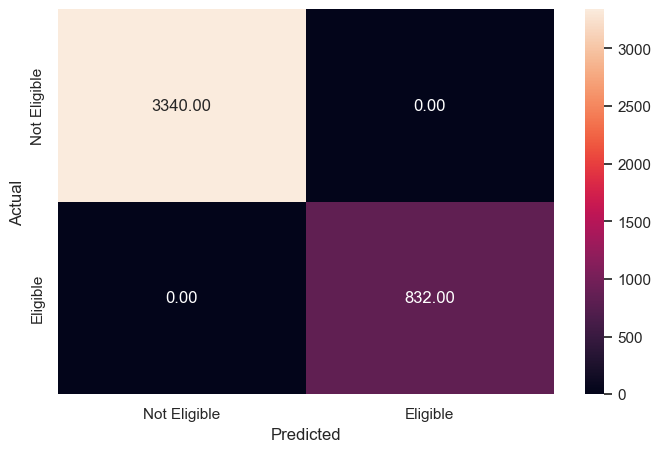

In [78]:
metrics_score(y_train, dt_pred_train)

#### Checking the performance on the test dataset

In [79]:
dt_pred_test = d_tree.predict(X_test)
dt_pred_test

array([0, 0, 0, ..., 0, 0, 0])

              precision    recall  f1-score   support

           0       0.91      0.92      0.91      1431
           1       0.66      0.62      0.64       357

    accuracy                           0.86      1788
   macro avg       0.78      0.77      0.78      1788
weighted avg       0.86      0.86      0.86      1788



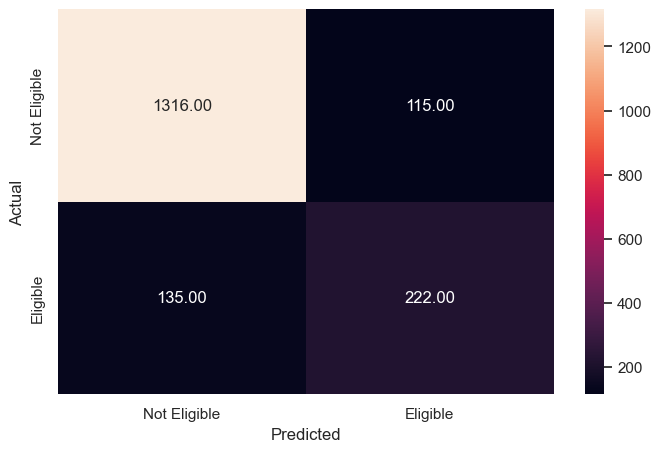

In [80]:
metrics_score(y_test, dt_pred_test)

**Insights**  
Recall for class 1 is quiet lower than that for class 0.  
Decision tree model is correctly predicting training data but not performing equally well on testing data. The model seems to be overfitting.

### Decision Tree - Hyperparameter Tuning

In [81]:
# Choose the type of classifier. 
d_tree_tuned = DecisionTreeClassifier(random_state = 2, class_weight = {0: 0.2, 1: 0.8})

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 10), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': np.arange(2, 20, 2)
             }


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_dt = GridSearchCV(d_tree_tuned, parameters, scoring=scorer, cv=5)

# Fit the GridSearch on train dataset
grid_dt = grid_dt.fit(X_train, y_train)

print(grid_dt.best_estimator_)

# Set the clf to the best combination of parameters
dt_clf = grid_dt.best_estimator_

# Fit the best algorithm to the data 
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, criterion='entropy',
                       max_depth=5, min_samples_leaf=16, random_state=2)


DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, criterion='entropy',
                       max_depth=5, min_samples_leaf=16, random_state=2)

#### Checking the performance on the training dataset

              precision    recall  f1-score   support

           0       0.95      0.87      0.91      3340
           1       0.61      0.82      0.70       832

    accuracy                           0.86      4172
   macro avg       0.78      0.85      0.81      4172
weighted avg       0.88      0.86      0.87      4172



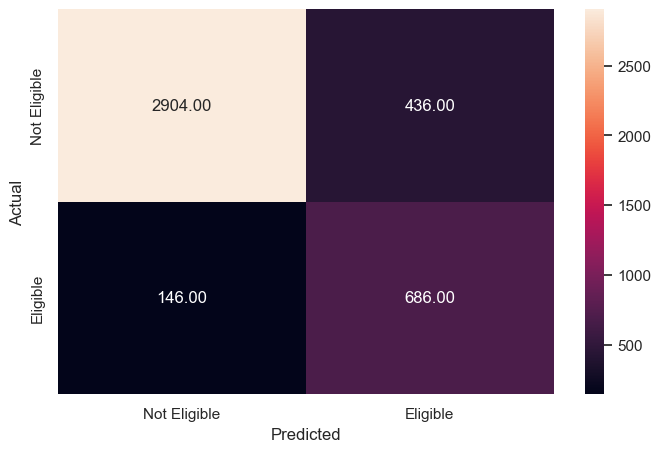

In [82]:
# Checking performance on the training data based on the tuned model
dt_clf_predict_train = dt_clf.predict(X_train)
metrics_score(y_train, dt_clf_predict_train)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.93      0.84      0.88      1431
           1       0.54      0.76      0.63       357

    accuracy                           0.82      1788
   macro avg       0.74      0.80      0.76      1788
weighted avg       0.85      0.82      0.83      1788



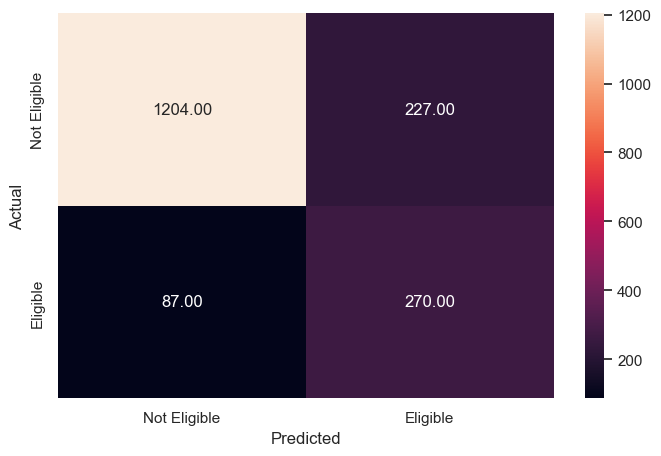

In [83]:
# Checking performance on the testing data based on the tuned model
dt_clf_predict_test = dt_clf.predict(X_test)
metrics_score(y_test, dt_clf_predict_test)

**Insights**  
The model is not performing as well on training data as without hyper-parameters. It no longer seems to be over-fitting after hyper-parameter tuning.  
The tuned model results in balanced recall between class 0 and 1 for the test data.

#### Plotting the Decision Tree

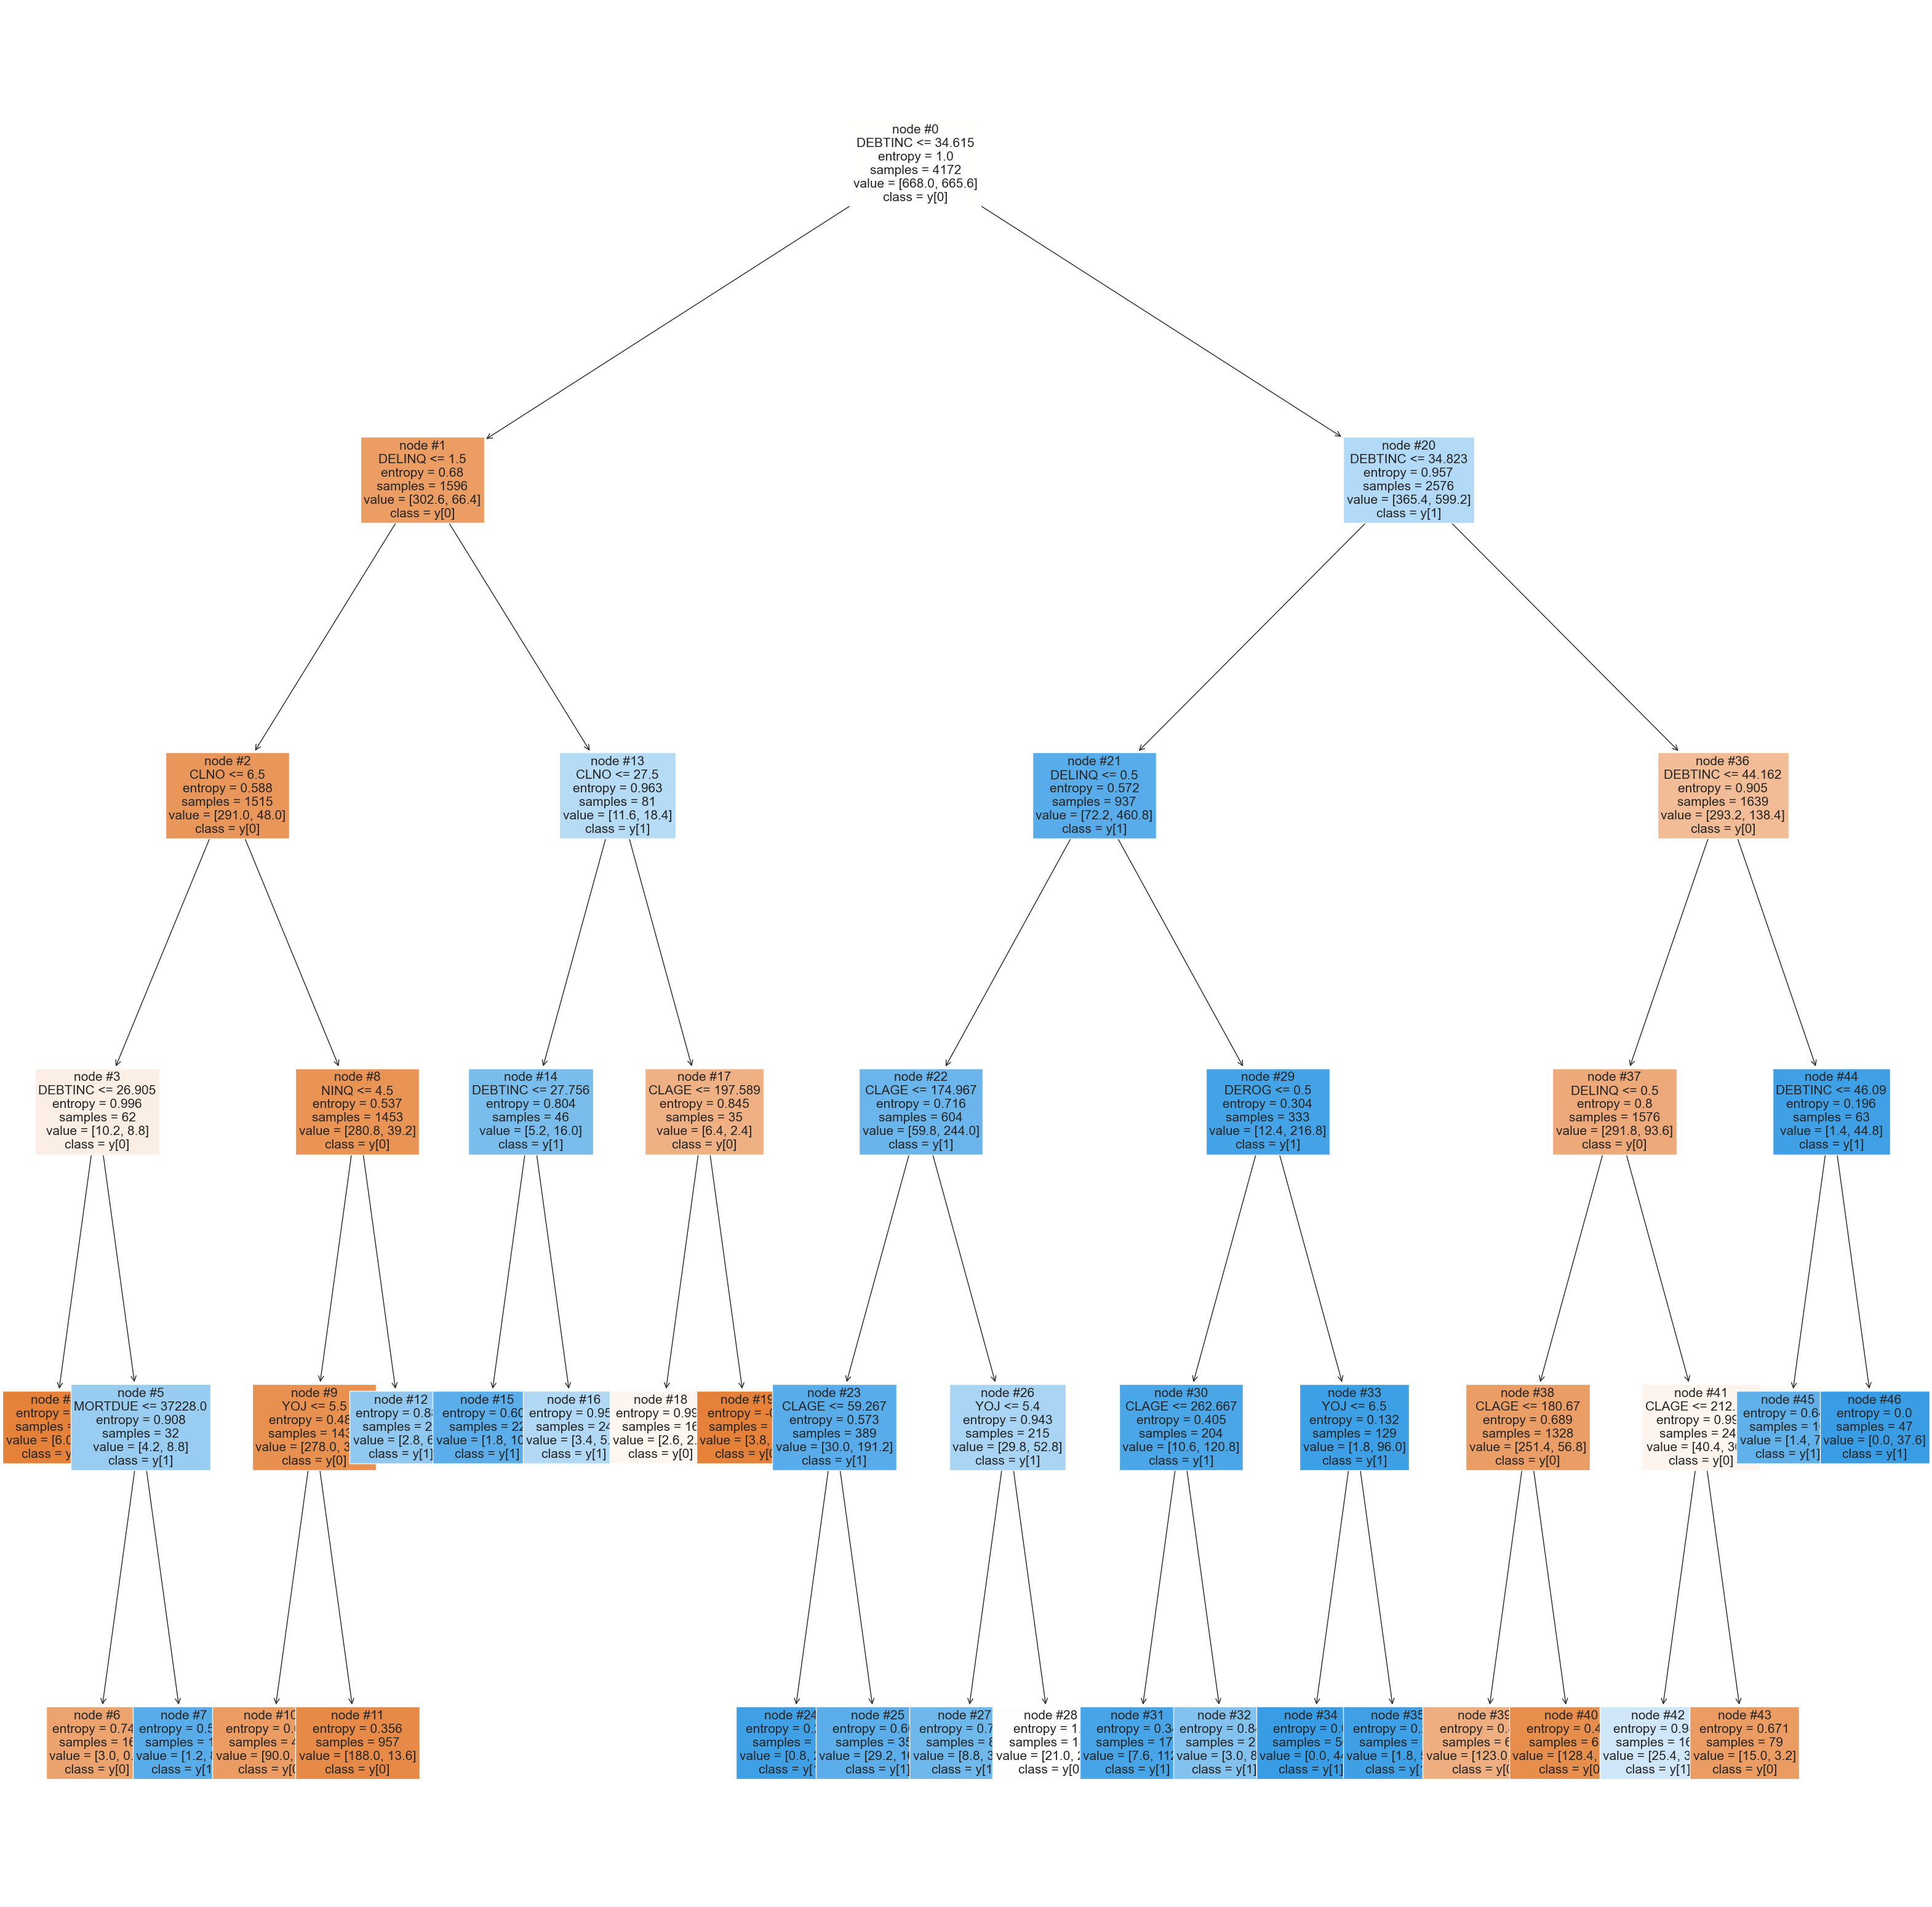

In [84]:
features = list(X.columns)

plt.figure(figsize = (40, 40))

tree.plot_tree(dt_clf, feature_names = features, filled = True, fontsize = 15, node_ids = True, class_names = True)

plt.show()

#### Business rules apparent from the Decision Tree:  
1. Lendees having Debt-to-income ratio <= 34.8 are highly unlikley to repay the loan. It is adviced to not offer loan to applicants having Debt-to-income ratio <= 34.8.
2. Lendees having Debt-to-income ratio between 34.8 and 44.2 are likley to repay the loan. They can be considered to offer a loan.
3. Lendees having Debt-to-income ratio > 44.2 are highly unlikley to repay the loan. It is adviced to not offer loan to applicants satisfying this condition.
4. Lendees with DELINQ <= 1.5, CLNO > 6.5 and NINQ <= 4.5 are highly likely to return the loan amount. If any applicant satisfies these conditions then the loan can be given.
5. Lendees with DELINQ > 1.5 and CLNO > 27.5 are highly likely to return the loan amount. If any applicant satisfies these conditions then the loan can be given.

### **Building a Random Forest Classifier**

**Random Forest is a bagging algorithm where the base models are Decision Trees.** Samples are taken from the training data and on each sample a decision tree makes a prediction. 

**The results from all the decision trees are combined together and the final prediction is made using voting or averaging.**

In [85]:
# Defining Random forest CLassifier
rf_clf = RandomForestClassifier(random_state=2, criterion = "entropy")

# Fitting the random forest tree classifier on the training data
rf_clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=2)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



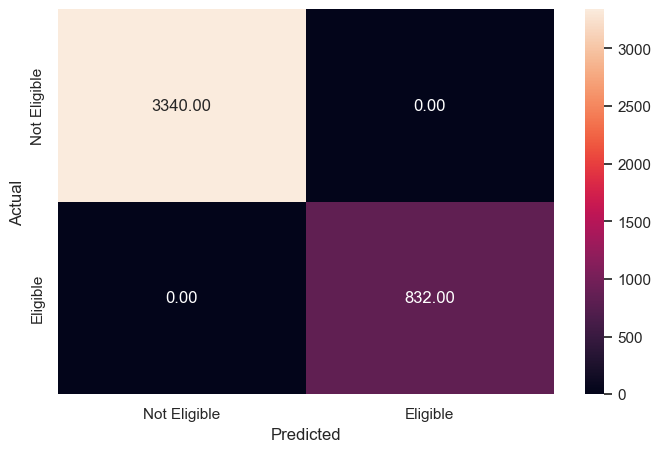

In [86]:
rf_train_predict = rf_clf.predict(X_train)
metrics_score(y_train, rf_train_predict)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      1431
           1       0.87      0.67      0.76       357

    accuracy                           0.91      1788
   macro avg       0.90      0.82      0.85      1788
weighted avg       0.91      0.91      0.91      1788



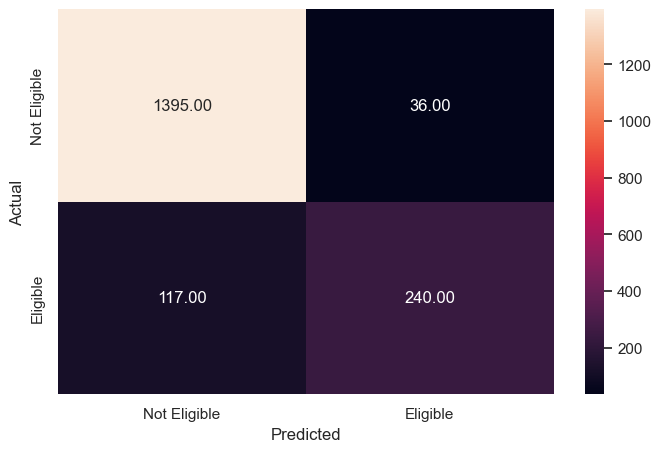

In [87]:
rf_test_predict = rf_clf.predict(X_test)
metrics_score(y_test, rf_test_predict)

**Insights**  
Recall for class 1 is lower than that for class 0.  
Random Forest model is correctly predicting training data but not performing equally well on testing data. The model seems to be overfitting.

### **Build a Random Forest model with Class Weights**

In [88]:
# Defining Random forest CLassifier
rf_wt_clf = RandomForestClassifier(random_state=2, criterion = "entropy", class_weight='balanced')

# Fitting the random forest tree classifier on the training data
rf_wt_clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       random_state=2)

#### Checking the performance on the training dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



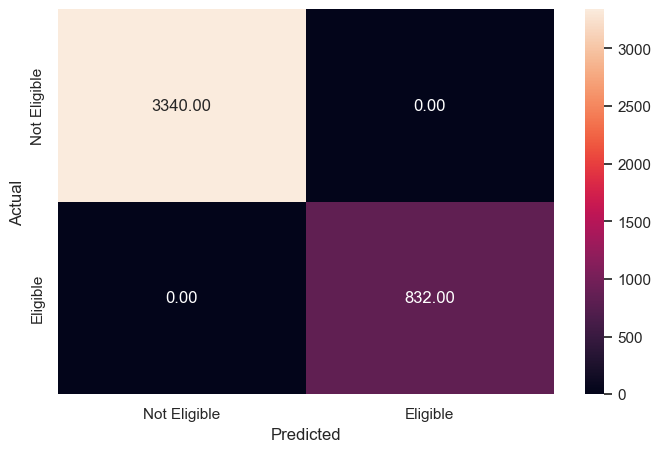

In [89]:
rf_wt_train_predict = rf_wt_clf.predict(X_train)
metrics_score(y_train, rf_wt_train_predict)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1431
           1       0.87      0.64      0.74       357

    accuracy                           0.91      1788
   macro avg       0.89      0.81      0.84      1788
weighted avg       0.91      0.91      0.90      1788



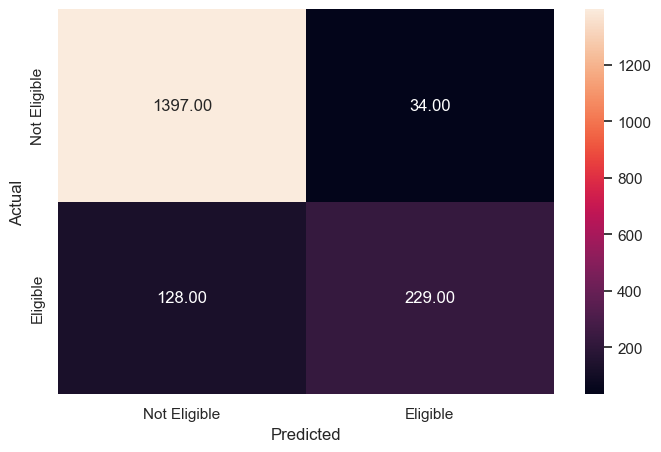

In [90]:
rf_wt_test_predict = rf_wt_clf.predict(X_test)
metrics_score(y_test, rf_wt_test_predict)

**Insights**  
Recall for class 1 is lower than that for class 0.  
Random Forest model with class weights is also correctly predicting training data but not performing equally well on testing data. This model also seems to be overfitting.  
Tried decreasing weight for class 0 and increasing weight for class 1 but that doesn't make significant difference. Balanced as the class weight is giving best possible balance in recall values for class 0 and class 1.

### **Tuning the Random Forest**

In [91]:
# Choose the type of classifier
rf_clf_tuned = RandomForestClassifier(criterion = "entropy", random_state = 2, class_weight='balanced')

# Grid of parameters to choose from
parameters = {"n_estimators": [100, 110, 120, 140],
              "max_depth": [5, 6, 7, 8],
              "max_features": [0.8, 0.9, 1, 'auto', 'sqrt', 'log2'],
              "min_samples_leaf": np.arange(2, 20, 2)
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_rf = GridSearchCV(rf_clf_tuned, parameters, scoring = scorer, cv = 5)

grid_rf = grid_rf.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
rf_clf_tuned = grid_rf.best_estimator_

In [92]:
rf_clf_tuned

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=8, max_features='auto', min_samples_leaf=10,
                       n_estimators=120, random_state=2)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      3340
           1       0.70      0.87      0.78       832

    accuracy                           0.90      4172
   macro avg       0.83      0.89      0.86      4172
weighted avg       0.91      0.90      0.90      4172



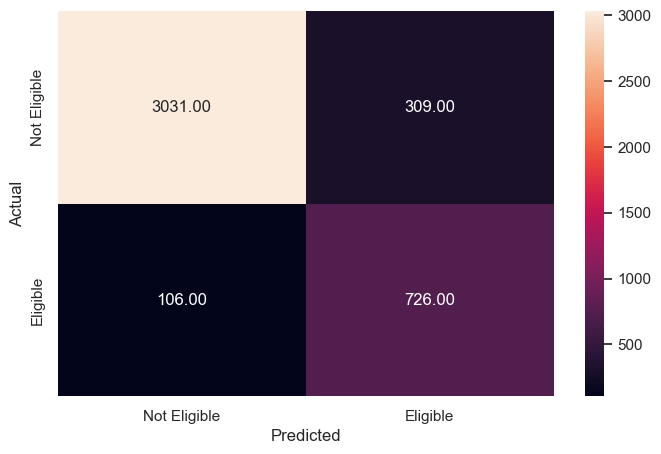

In [93]:
rf_train_clf_tuned = rf_clf_tuned.predict(X_train)
metrics_score(y_train, rf_train_clf_tuned)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.94      0.89      0.91      1431
           1       0.64      0.76      0.69       357

    accuracy                           0.87      1788
   macro avg       0.79      0.83      0.80      1788
weighted avg       0.88      0.87      0.87      1788



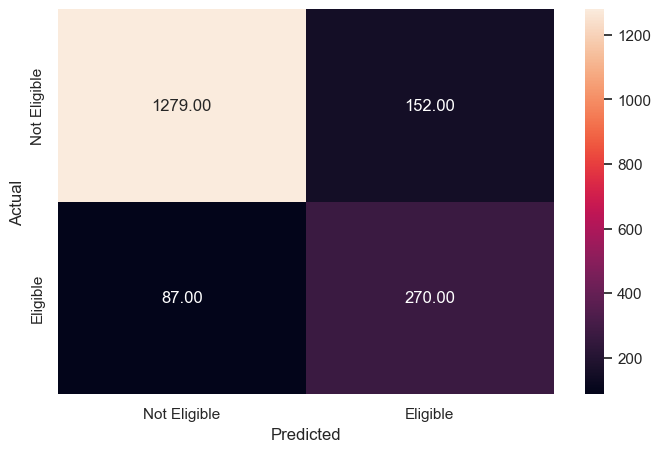

In [94]:
rf_test_clf_tuned = rf_clf_tuned.predict(X_test)
metrics_score(y_test, rf_test_clf_tuned)

**Observations:**
* The tuned model is not performing well on both training and testing data as compared to before hyper-parameter training. The accuracy is reduced as as compared to without hyper-parameter training
* But, there is a balance in the recall value for class 1 and class 0.

#### Plot the Feature importance of the tuned Random Forest

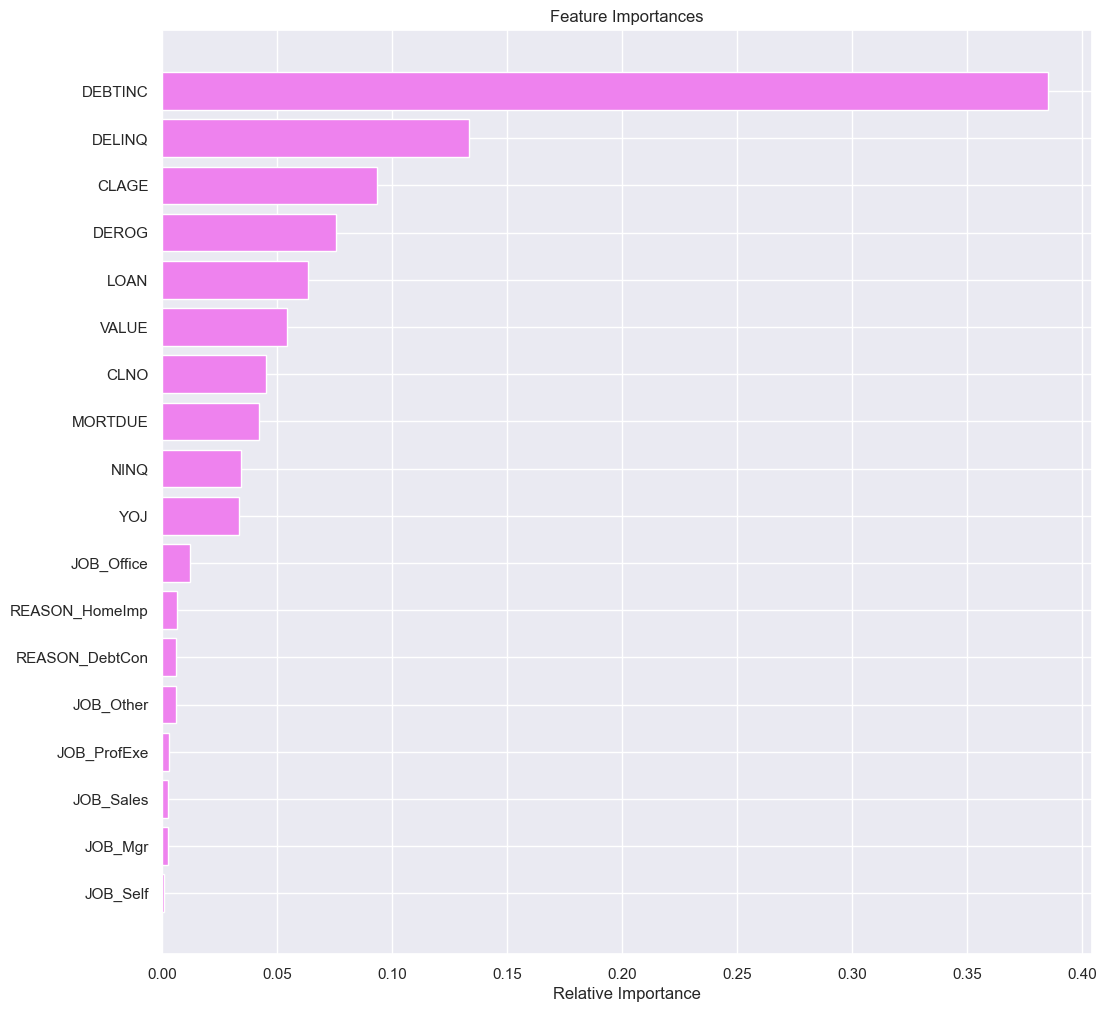

In [95]:
importances = rf_clf_tuned.feature_importances_

indices = np.argsort(importances)

feature_names = list(X.columns)

plt.figure(figsize = (12, 12))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

**Insights**
* DEBTINC and DELINQ are the most important features for deciding whether the applicant will repay the loan as per both Decision Tree and Random Forest models.
* CLAGE, DEROG, LOAN and VALUE are also important contributors to deciding whether the applicant is capable to repay the loan as per the Random Forest model.

### **Comparing Model Performances**

In [96]:
def get_recall_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    a = [] # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    a.append(train_recall) # adding train recall to list 
    a.append(test_recall) # adding test recall to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
    
    return a # returning the list with train and test scores

In [97]:
##  Function to calculate precision score
def get_precision_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    b = []  # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    b.append(train_precision) # adding train precision to list
    b.append(test_precision) # adding test precision to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

    return b # returning the list with train and test scores

In [98]:
##  Function to calculate accuracy score
def get_accuracy_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    c = [] # defining an empty list to store train and test results
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    c.append(train_acc) # adding train accuracy to list
    c.append(test_acc) # adding test accuracy to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
    
    return c # returning the list with train and test scores

In [99]:
# trained models
models = [lr_clf, lr_clf_balance, d_tree, dt_clf, rf_clf, rf_wt_clf, rf_clf_tuned]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy,recall and precision scores
for model in models:
     # accuracy score
    j = get_accuracy_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])

    # recall score
    k = get_recall_score(model,False)
    recall_train.append(k[0])
    recall_test.append(k[1])

    # precision score
    l = get_precision_score(model,False)
    precision_train.append(l[0])
    precision_test.append(l[1])

In [100]:
comparison_frame = pd.DataFrame({'Model':['Logistic Regression', 'Logistic Regression with class weight', 'Decision Tree', 'Tuned Decision Tree', 'Random Forest', 'Random Forest with class weight', 'Tuned Random Forest'], 
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Recall': recall_train,
                                          'Test_Recall': recall_test,
                                          'Train_Precision': precision_train,
                                          'Test_Precision': precision_test}) 
comparison_frame

Model  Train_Accuracy  Test_Accuracy  \
0                    Logistic Regression        0.804890       0.798098   
1  Logistic Regression with class weight        0.607622       0.593960   
2                          Decision Tree        1.000000       0.860179   
3                    Tuned Decision Tree        0.860499       0.824385   
4                          Random Forest        1.000000       0.914430   
5        Random Forest with class weight        1.000000       0.909396   
6                    Tuned Random Forest        0.900527       0.866331   

   Train_Recall  Test_Recall  Train_Precision  Test_Precision  
0      0.037260     0.016807         0.704545        0.375000  
1      0.673077     0.669468         0.290909        0.282172  
2      1.000000     0.621849         1.000000        0.658754  
3      0.824519     0.756303         0.611408        0.543260  
4      1.000000     0.672269         1.000000        0.869565  
5      1.000000     0.641457         1.000000        0.870722  
6      0.872596     0.756303         0.701449        0.639810

**Insights**
* Tuned Random Forest has the best recall for class 1.
* Tuned versions of all models are performing better than the same models without hyper-parameter tuning.

**1. Refined insights -**  
* Lendees having Debt-to-income ratio <= 34.8 are highly unlikely to repay the loan. It is advised not to offer loans to applicants having Debt-to-income ratio <= 34.8.
* Lendees having Debt-to-income ratio between 34.8 and 44.2 are likely to repay the loan. They can be considered to offer a loan.
* Lendees having Debt-to-income ratio > 44.2 are highly unlikely to repay the loan. It is advised to not offer loans to applicants satisfying this condition.
* Lendees with DELINQ <= 1.5, CLNO > 6.5 and NINQ <= 4.5 are highly likely to return the loan amount. If any applicant satisfies these conditions then the loan can be given.
* Lendees with DELINQ > 1.5 and CLNO > 27.5 are highly likely to return the loan amount. If any applicant satisfies these conditions then the loan can be given.
* DEBTINC and DELINQ are the most important features for deciding whether the applicant will repay the loan.
* CLAGE, DEROG, LOAN and VALUE are also significant contributors to deciding whether the applicant is capable of repaying the loan.

**2. Comparison of various techniques and their relative performance -**  

* Tuned Random Forest is relatively performing better than than the other models.
* Tuned versions of all models are performing better than the same models without hyper-parameter tuning.
* Without tuning the models are overfitting to the training data.
* Random Forest with class weights is also overfitting but the recall for class 1 is better than that for Random Forest without class weights.
* Removing attributes which are relatively insignificant could improve the model.
* Ratio of VALUE to LOAN (VALUE/LOAN) could be one of the model features which could improve the model.

**3. Proposal for the final solution design -**  
*  Tuned Random Forest is recommended to be adopted. This is best as it gives balanced recall for class 0 and class 1. Also, recall for class 1 is comparatively better than the remaining models considering it is balanced. The trained Tuned Random Forest model considers DEBTINC, DELINQ, and CLAGE as important features.